# Part 1: PCA:

Problem Statement: The ‘Hair Salon.csv’View in a new window dataset contains various variables used for the context of Market Segmentation. This particular case study is based on various parameters of a salon chain of hair products. You are expected to do Principal Component Analysis for this case study according to the instructions given in the rubric. Kindly refer to the PCA_Data_Dictionary.jpgView in a new window file for the Data Dictionary of the Dataset.  
Note: This particular dataset contains the target variable satisfaction as well. Please drop this variable before doing Principal Component Analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('Factor-Hair-Revised (1) (1).csv')

In [3]:
data.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [4]:
data.tail()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
95,96,8.6,4.8,5.6,5.3,2.3,6.0,5.7,6.7,5.8,4.9,3.6,7.3
96,97,7.4,3.4,2.6,5.0,4.1,4.4,4.8,7.2,4.5,4.2,3.7,6.3
97,98,8.7,3.2,3.3,3.2,3.1,6.1,2.9,5.6,5.0,3.1,2.5,5.4
98,99,7.8,4.9,5.8,5.3,5.2,5.3,7.1,7.9,6.0,4.3,3.9,6.4
99,100,7.9,3.0,4.4,5.1,5.9,4.2,4.8,9.7,5.7,3.4,3.5,6.4


In [5]:
data.shape

(100, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [7]:
data.describe()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000
mean,50.500000,7.810000,3.672000,5.365000,5.442000,4.010000,5.805000,5.12300,6.974000,6.043000,4.27800,3.886000,6.918000
std,29.011492,1.396279,0.700516,1.530457,1.208403,1.126943,1.315285,1.07232,1.545055,0.819738,0.92884,0.734437,1.191839
min,1.000000,5.000000,2.200000,1.300000,2.600000,1.900000,2.300000,2.90000,3.700000,4.100000,2.00000,1.600000,4.700000
25%,25.750000,6.575000,3.275000,4.250000,4.600000,3.175000,4.700000,4.50000,5.875000,5.400000,3.70000,3.400000,6.000000
50%,50.500000,8.000000,3.600000,5.400000,5.450000,4.000000,5.750000,4.90000,7.100000,6.100000,4.40000,3.900000,7.050000
75%,75.250000,9.100000,3.925000,6.625000,6.325000,4.800000,6.800000,5.80000,8.400000,6.600000,4.80000,4.425000,7.625000
max,100.000000,10.000000,5.700000,8.500000,7.800000,6.500000,8.400000,8.20000,9.900000,8.100000,6.70000,5.500000,9.900000


In [8]:
data.isnull().sum()

ID              0
ProdQual        0
Ecom            0
TechSup         0
CompRes         0
Advertising     0
ProdLine        0
SalesFImage     0
ComPricing      0
WartyClaim      0
OrdBilling      0
DelSpeed        0
Satisfaction    0
dtype: int64

In [60]:
data.duplicated().sum()

0

In [59]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(data[column].describe(),end=' ')
    
    
    plt.figure(figsize=[25,10])
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    a=round(data[column].min())
    b=round(data[column].max())
    freq, bins, patches = plt.hist(data[column], bins=nbins, range=[a,b], edgecolor='Black', color='cyan')
    bin_centers = np.diff(bins)*0.5 + bins[:-1]
    n = 0
    #plt.legend()
    #plt.xticks(range(a,b,round((b-a)/nbins)))
    plt.show;
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=data[column])
    #ax.legend()
    plt.show()

In [11]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(data_num.columns.values)
len(lstnumericcolumns)

13

In [12]:
type(lstnumericcolumns)

list

In [13]:
lstnumericcolumns

['ID',
 'ProdQual',
 'Ecom',
 'TechSup',
 'CompRes',
 'Advertising',
 'ProdLine',
 'SalesFImage',
 'ComPricing',
 'WartyClaim',
 'OrdBilling',
 'DelSpeed',
 'Satisfaction']

In [14]:
data_num.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [15]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            100 non-null    int64  
 1   ProdQual      100 non-null    float64
 2   Ecom          100 non-null    float64
 3   TechSup       100 non-null    float64
 4   CompRes       100 non-null    float64
 5   Advertising   100 non-null    float64
 6   ProdLine      100 non-null    float64
 7   SalesFImage   100 non-null    float64
 8   ComPricing    100 non-null    float64
 9   WartyClaim    100 non-null    float64
 10  OrdBilling    100 non-null    float64
 11  DelSpeed      100 non-null    float64
 12  Satisfaction  100 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 10.3 KB


In [16]:
data_num.corr()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ID,1.000000,0.145774,-0.046173,0.031838,-0.144322,0.073129,-0.048641,0.013848,-0.063007,0.058592,-0.178352,-0.172134,0.061143
ProdQual,0.145774,1.000000,-0.137163,0.095600,0.106370,-0.053473,0.477493,-0.151813,-0.401282,0.088312,0.104303,0.027718,0.486325
Ecom,-0.046173,-0.137163,1.000000,0.000867,0.140179,0.429891,-0.052688,0.791544,0.229462,0.051898,0.156147,0.191636,0.282745
TechSup,0.031838,0.095600,0.000867,1.000000,0.096657,-0.062870,0.192625,0.016991,-0.270787,0.797168,0.080102,0.025441,0.112597
CompRes,-0.144322,0.106370,0.140179,0.096657,1.000000,0.196917,0.561417,0.229752,-0.127954,0.140408,0.756869,0.865092,0.603263
Advertising,0.073129,-0.053473,0.429891,-0.062870,0.196917,1.000000,-0.011551,0.542204,0.134217,0.010792,0.184236,0.275863,0.304669
ProdLine,-0.048641,0.477493,-0.052688,0.192625,0.561417,-0.011551,1.000000,-0.061316,-0.494948,0.273078,0.424408,0.601850,0.550546
SalesFImage,0.013848,-0.151813,0.791544,0.016991,0.229752,0.542204,-0.061316,1.000000,0.264597,0.107455,0.195127,0.271551,0.500205
ComPricing,-0.063007,-0.401282,0.229462,-0.270787,-0.127954,0.134217,-0.494948,0.264597,1.000000,-0.244986,-0.114567,-0.072872,-0.208296
WartyClaim,0.058592,0.088312,0.051898,0.797168,0.140408,0.010792,0.273078,0.107455,-0.244986,1.000000,0.197065,0.109395,0.177545


In [17]:
data_num.cov()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ID,841.666667,5.905051,-0.938384,1.413636,-5.059596,2.390909,-1.856061,0.430808,-2.824242,1.393434,-4.806061,-3.667677,2.114141
ProdQual,5.905051,1.949596,-0.134162,0.204293,0.179475,-0.084141,0.876919,-0.227303,-0.865697,0.101081,0.135273,0.028424,0.809313
Ecom,-0.938384,-0.134162,0.490723,0.000929,0.118663,0.339374,-0.048545,0.594590,0.248356,0.029802,0.101600,0.098594,0.236065
TechSup,1.413636,0.204293,0.000929,2.342298,0.178758,-0.108434,0.387753,0.027884,-0.640313,1.000106,0.113869,0.028596,0.205384
CompRes,-5.059596,0.179475,0.118663,0.178758,1.460238,0.268162,0.892313,0.297711,-0.238897,0.139085,0.849519,0.767766,0.868832
Advertising,2.390909,-0.084141,0.339374,-0.108434,0.268162,1.270000,-0.017121,0.655222,0.233697,0.009970,0.192848,0.228323,0.409212
ProdLine,-1.856061,0.876919,-0.048545,0.387753,0.892313,-0.017121,1.729975,-0.086480,-1.005828,0.294429,0.518495,0.581384,0.863040
SalesFImage,0.430808,-0.227303,0.594590,0.027884,0.297711,0.655222,-0.086480,1.149870,0.438382,0.094456,0.194349,0.213861,0.639279
ComPricing,-2.824242,-0.865697,0.248356,-0.640313,-0.238897,0.233697,-1.005828,0.438382,2.387196,-0.310285,-0.164416,-0.082691,-0.383568
WartyClaim,1.393434,0.101081,0.029802,1.000106,0.139085,0.009970,0.294429,0.094456,-0.310285,0.671971,0.150046,0.065861,0.173461


Description of ID
----------------------------------------------------------------------------
count    100.000000
mean      50.500000
std       29.011492
min        1.000000
25%       25.750000
50%       50.500000
75%       75.250000
max      100.000000
Name: ID, dtype: float64 Distribution of ID
----------------------------------------------------------------------------
BoxPlot of ID
----------------------------------------------------------------------------


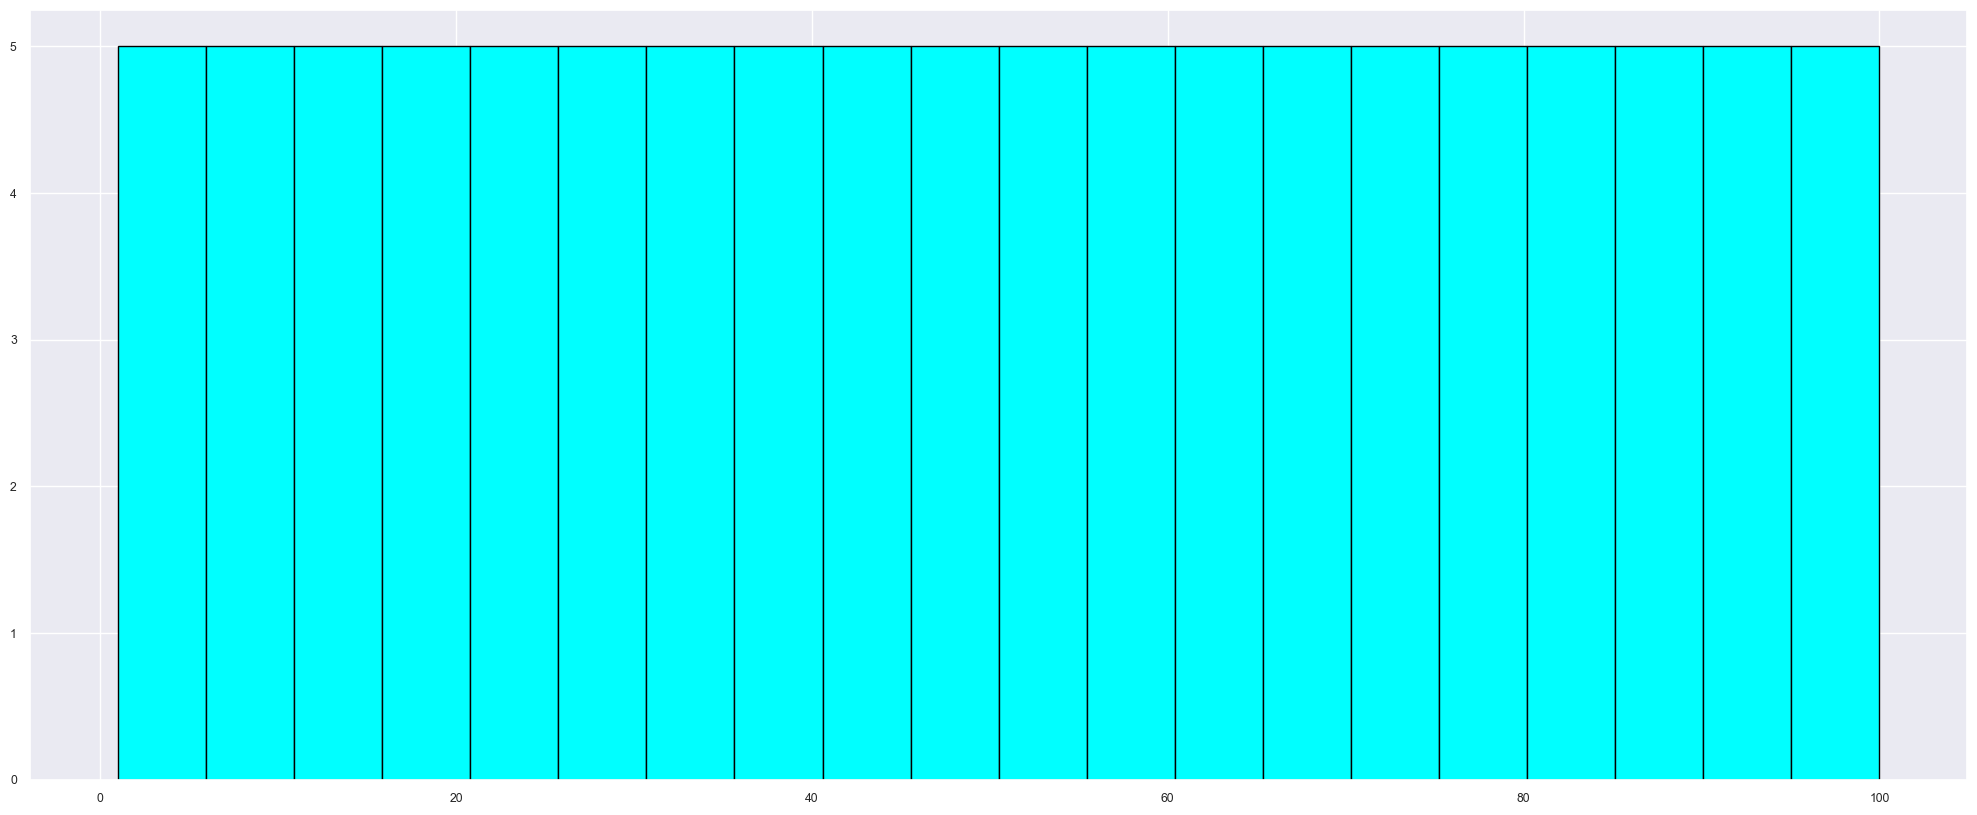

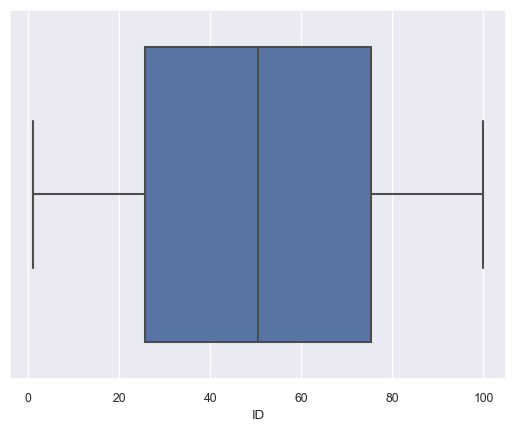

Description of ProdQual
----------------------------------------------------------------------------
count    100.000000
mean       7.810000
std        1.396279
min        5.000000
25%        6.575000
50%        8.000000
75%        9.100000
max       10.000000
Name: ProdQual, dtype: float64 Distribution of ProdQual
----------------------------------------------------------------------------
BoxPlot of ProdQual
----------------------------------------------------------------------------


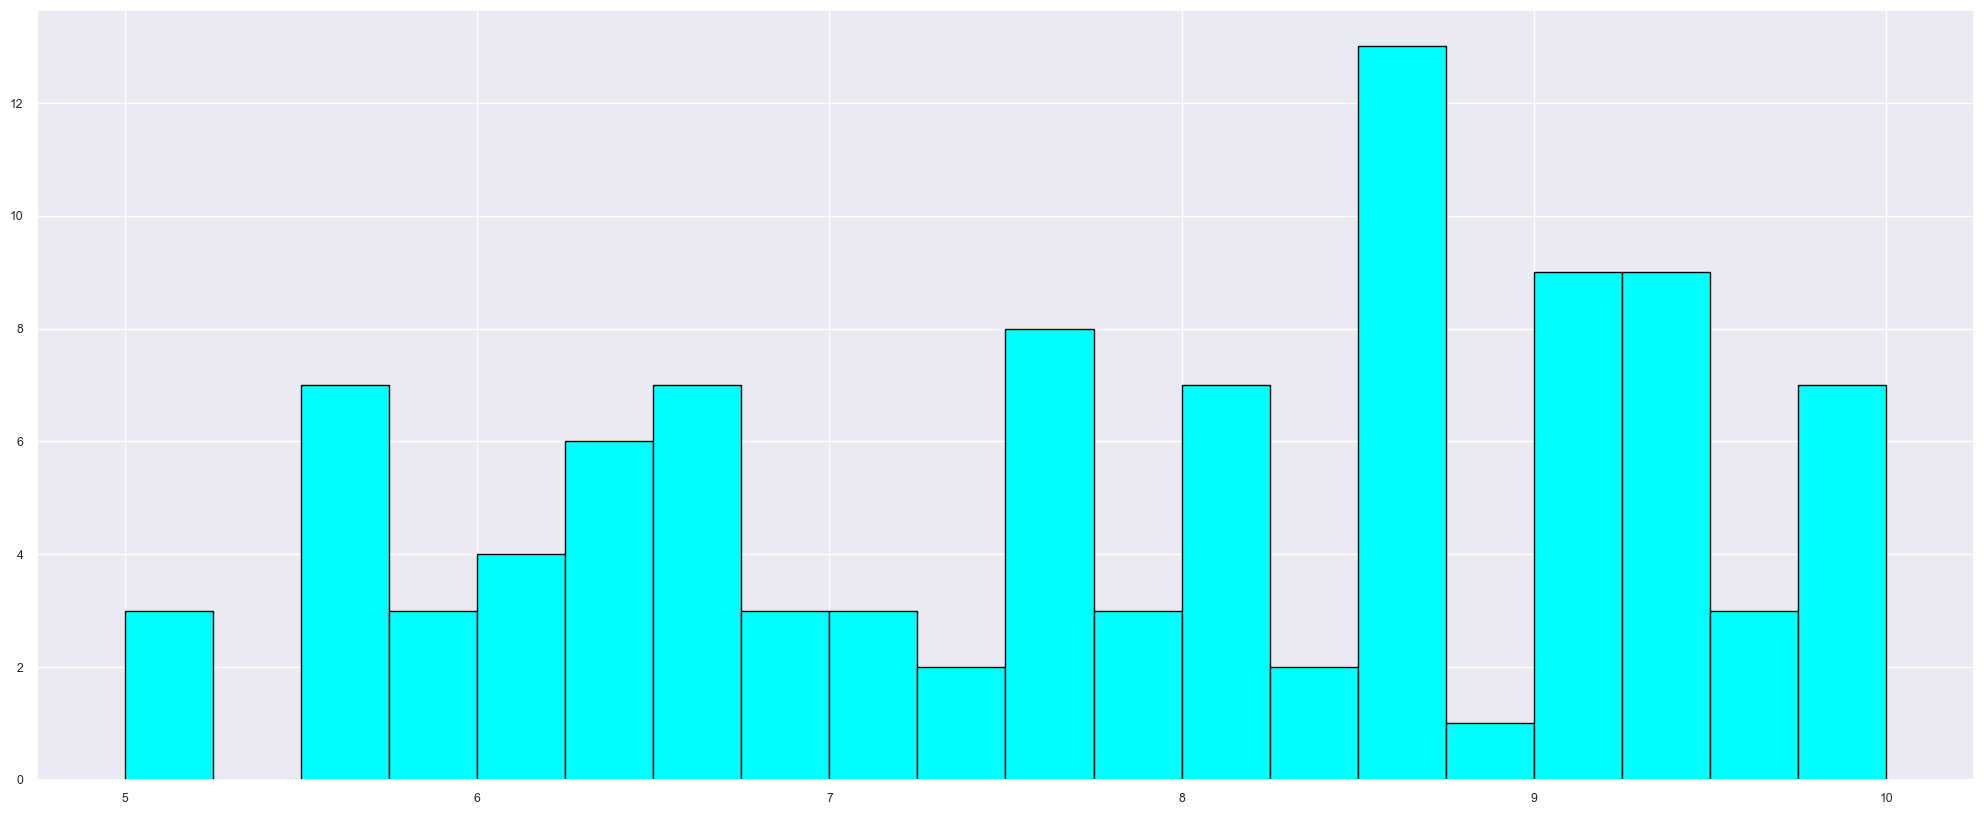

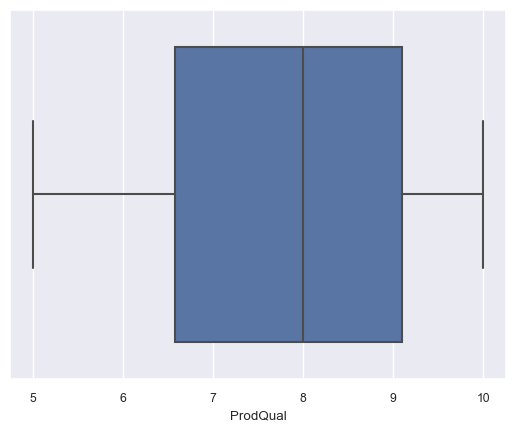

Description of Ecom
----------------------------------------------------------------------------
count    100.000000
mean       3.672000
std        0.700516
min        2.200000
25%        3.275000
50%        3.600000
75%        3.925000
max        5.700000
Name: Ecom, dtype: float64 Distribution of Ecom
----------------------------------------------------------------------------
BoxPlot of Ecom
----------------------------------------------------------------------------


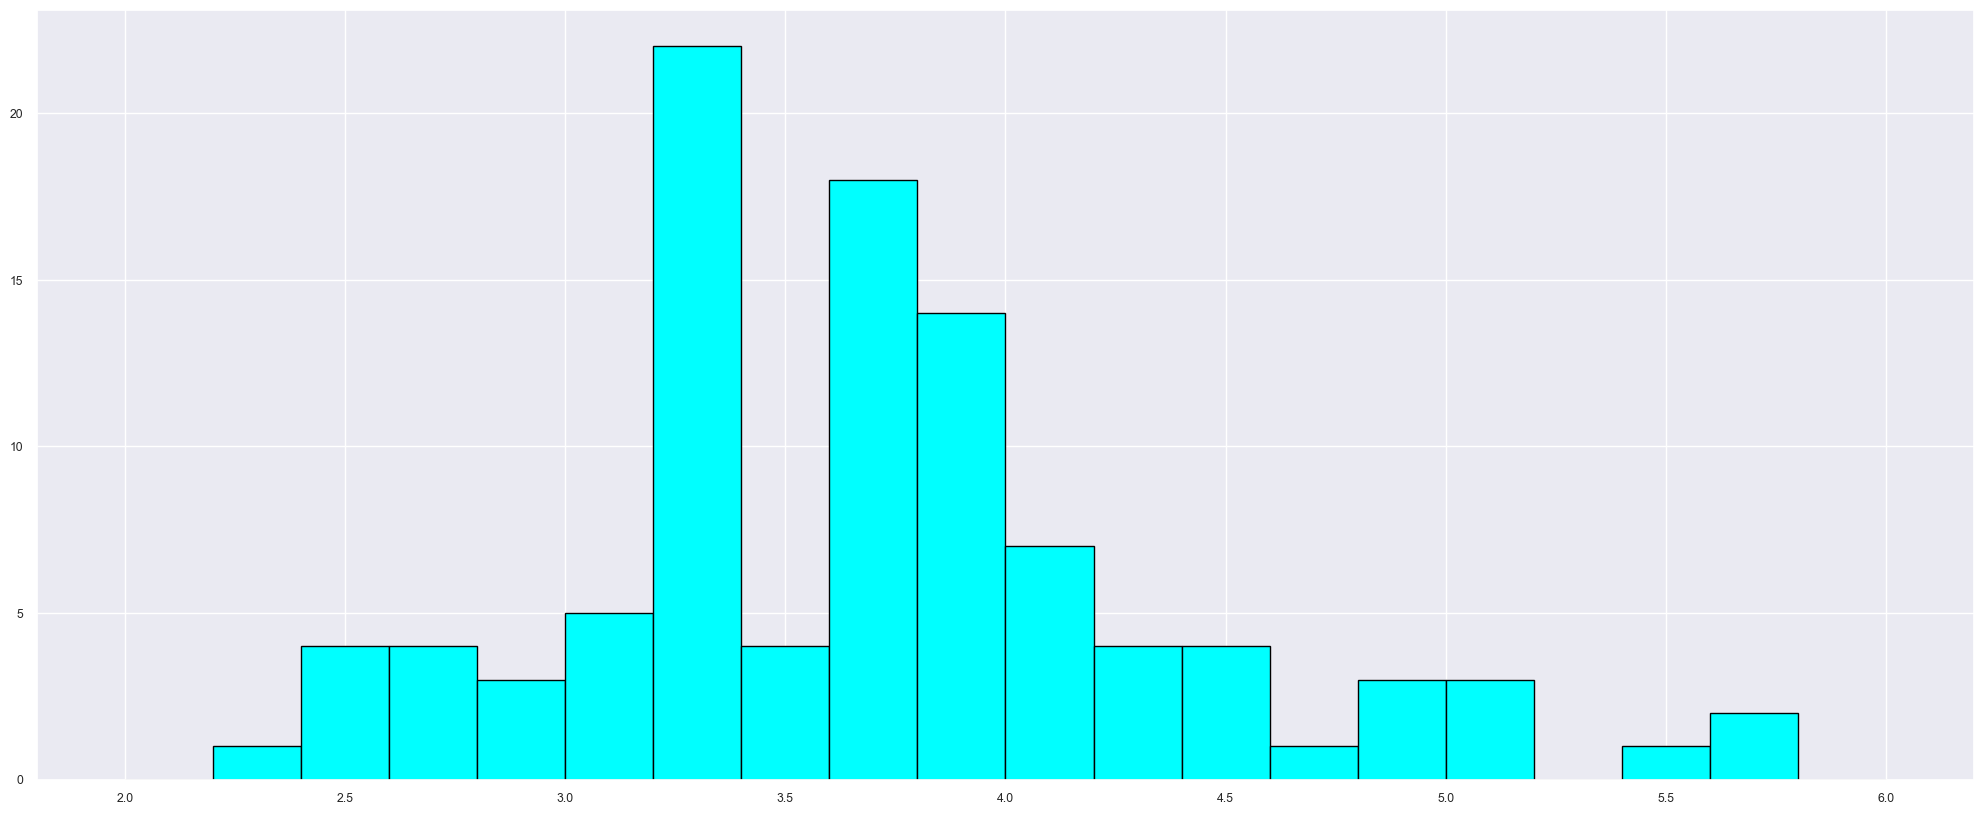

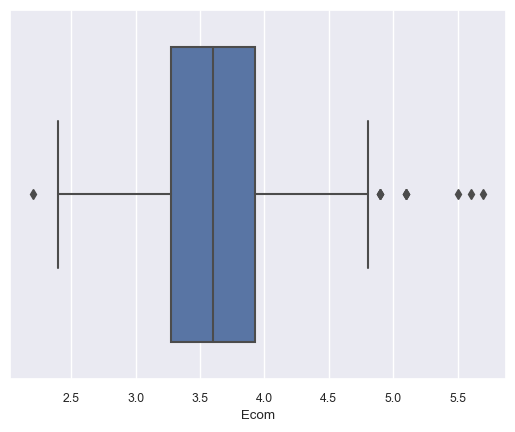

Description of TechSup
----------------------------------------------------------------------------
count    100.000000
mean       5.365000
std        1.530457
min        1.300000
25%        4.250000
50%        5.400000
75%        6.625000
max        8.500000
Name: TechSup, dtype: float64 Distribution of TechSup
----------------------------------------------------------------------------
BoxPlot of TechSup
----------------------------------------------------------------------------


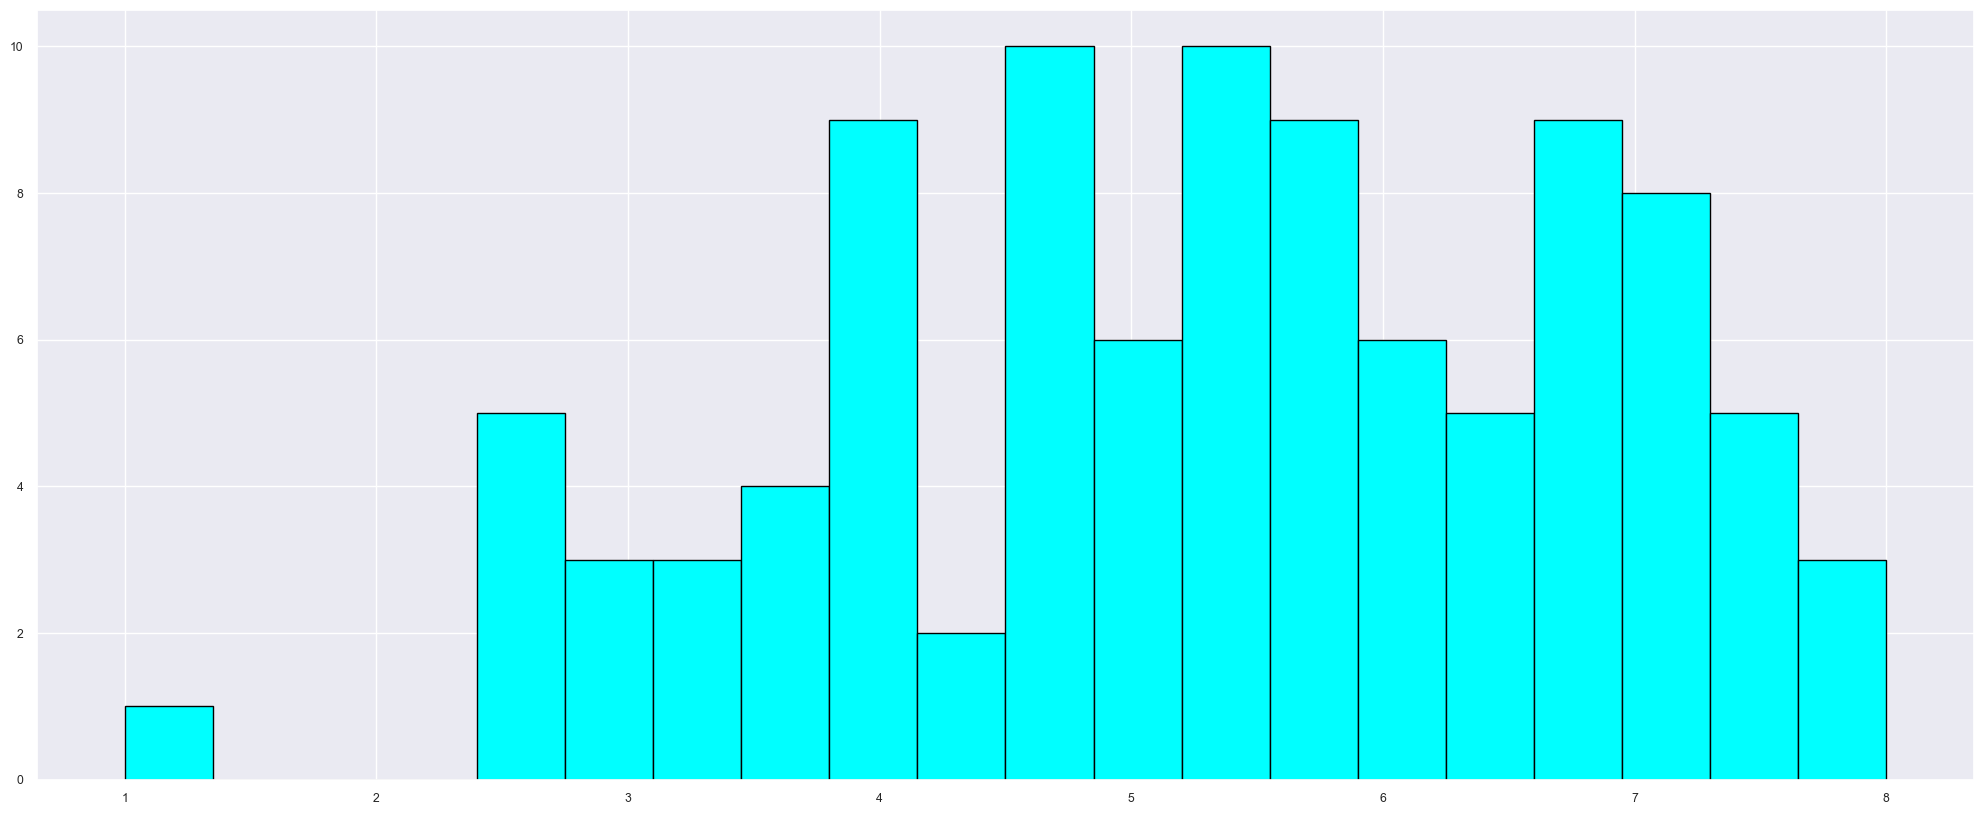

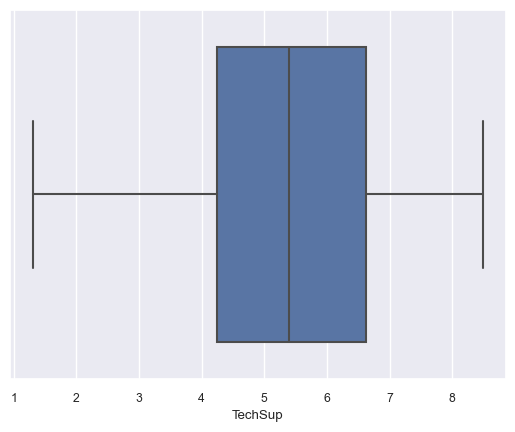

Description of CompRes
----------------------------------------------------------------------------
count    100.000000
mean       5.442000
std        1.208403
min        2.600000
25%        4.600000
50%        5.450000
75%        6.325000
max        7.800000
Name: CompRes, dtype: float64 Distribution of CompRes
----------------------------------------------------------------------------
BoxPlot of CompRes
----------------------------------------------------------------------------


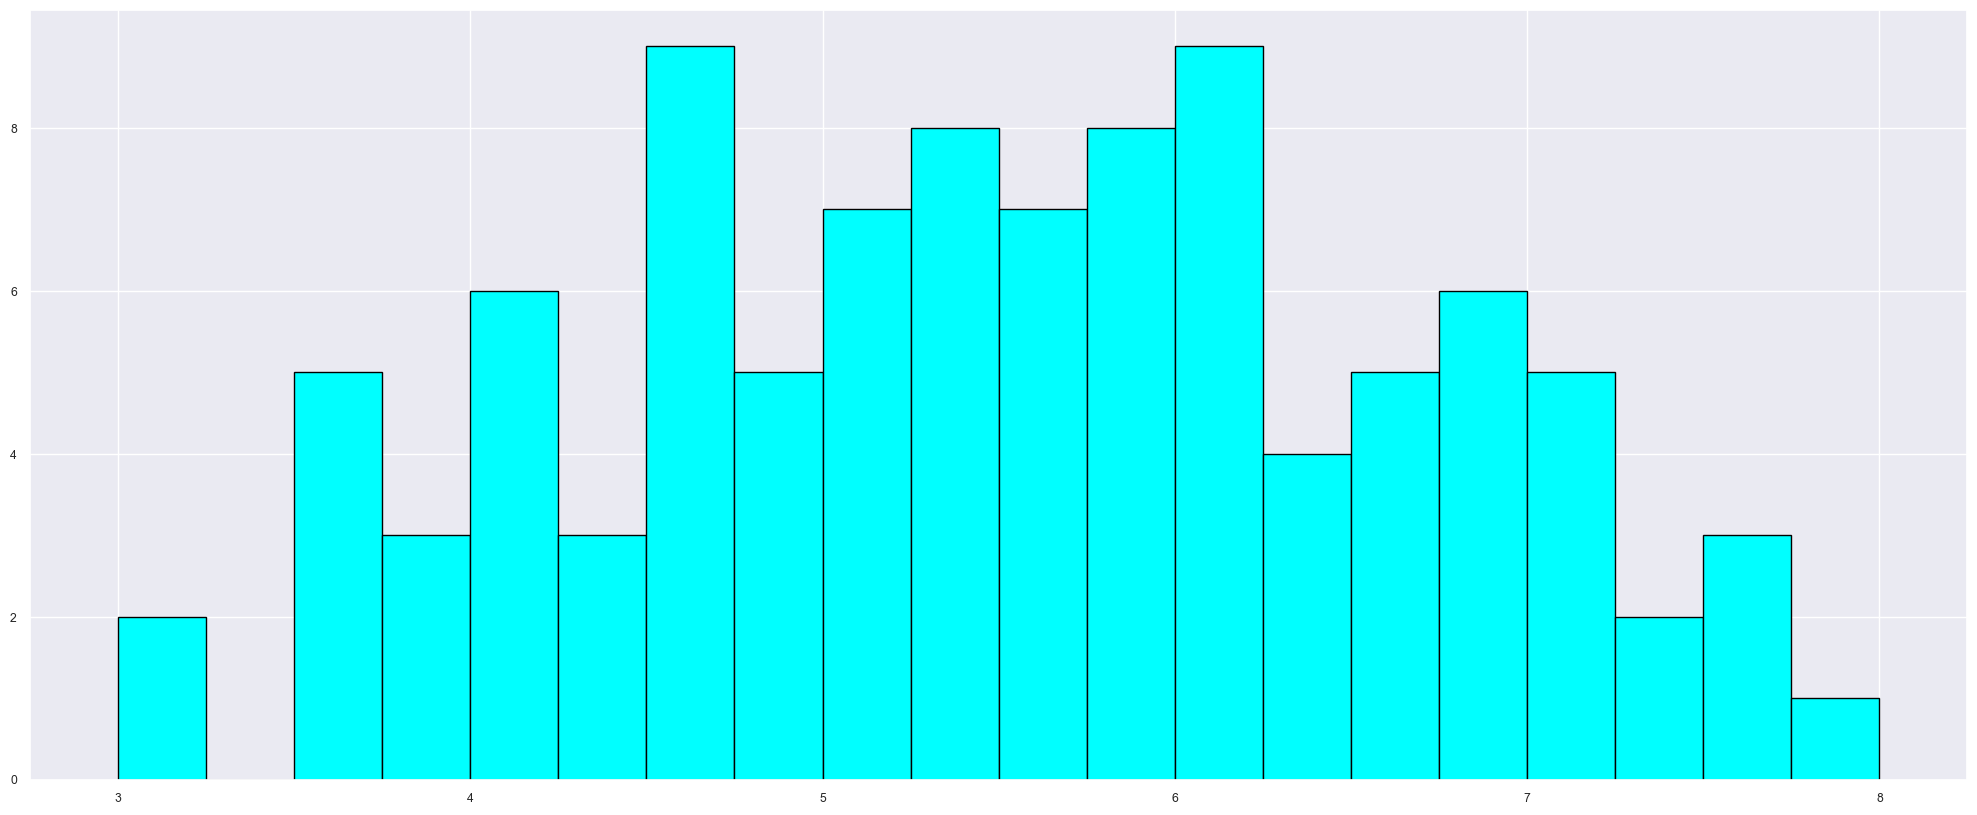

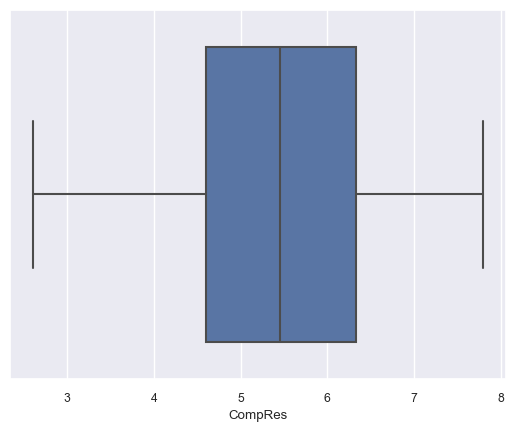

Description of Advertising
----------------------------------------------------------------------------
count    100.000000
mean       4.010000
std        1.126943
min        1.900000
25%        3.175000
50%        4.000000
75%        4.800000
max        6.500000
Name: Advertising, dtype: float64 Distribution of Advertising
----------------------------------------------------------------------------
BoxPlot of Advertising
----------------------------------------------------------------------------


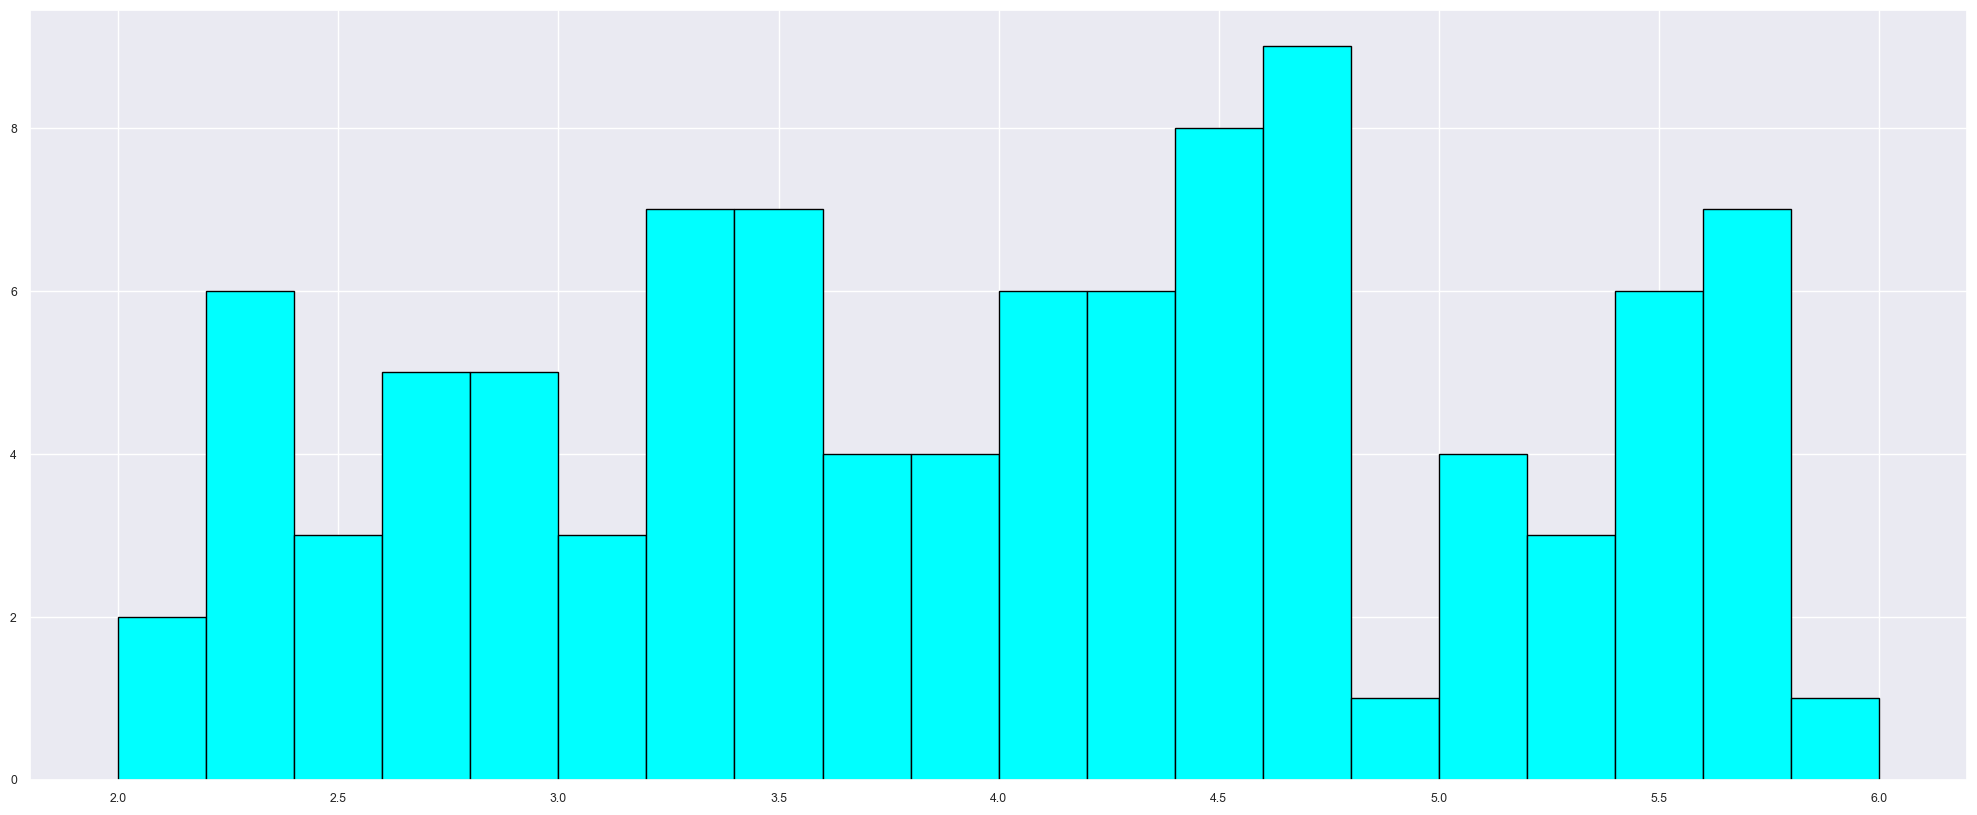

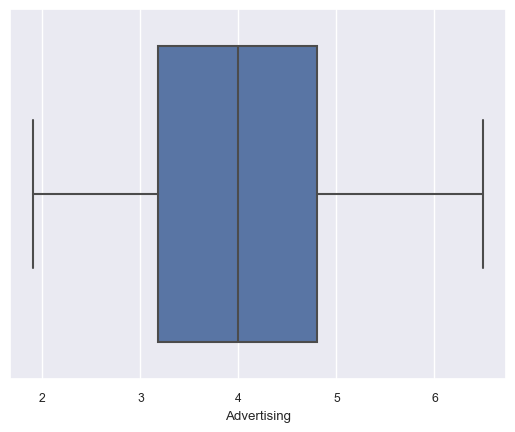

Description of ProdLine
----------------------------------------------------------------------------
count    100.000000
mean       5.805000
std        1.315285
min        2.300000
25%        4.700000
50%        5.750000
75%        6.800000
max        8.400000
Name: ProdLine, dtype: float64 Distribution of ProdLine
----------------------------------------------------------------------------
BoxPlot of ProdLine
----------------------------------------------------------------------------


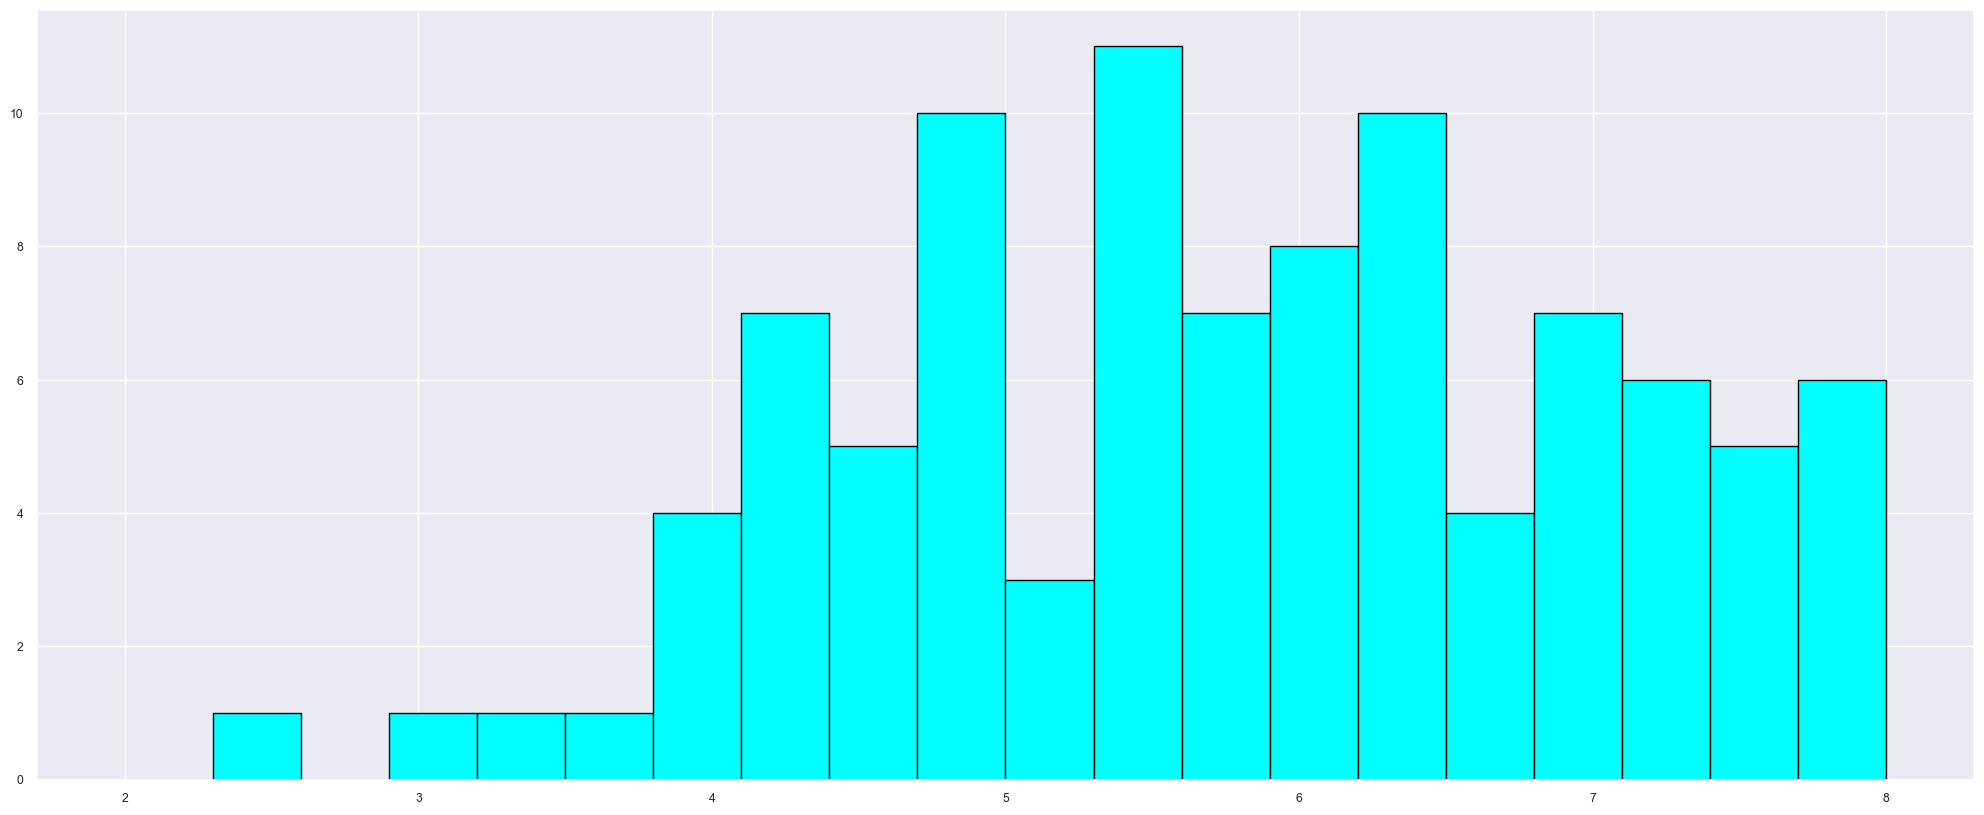

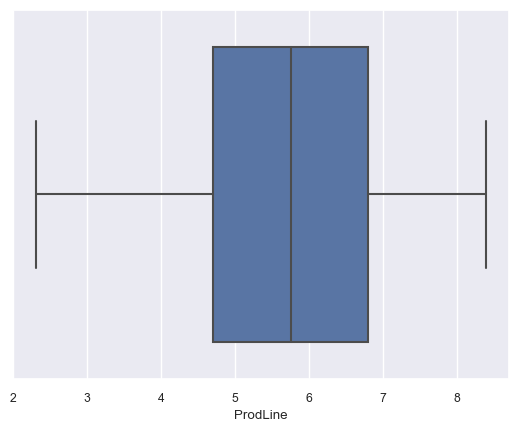

Description of SalesFImage
----------------------------------------------------------------------------
count    100.00000
mean       5.12300
std        1.07232
min        2.90000
25%        4.50000
50%        4.90000
75%        5.80000
max        8.20000
Name: SalesFImage, dtype: float64 Distribution of SalesFImage
----------------------------------------------------------------------------
BoxPlot of SalesFImage
----------------------------------------------------------------------------


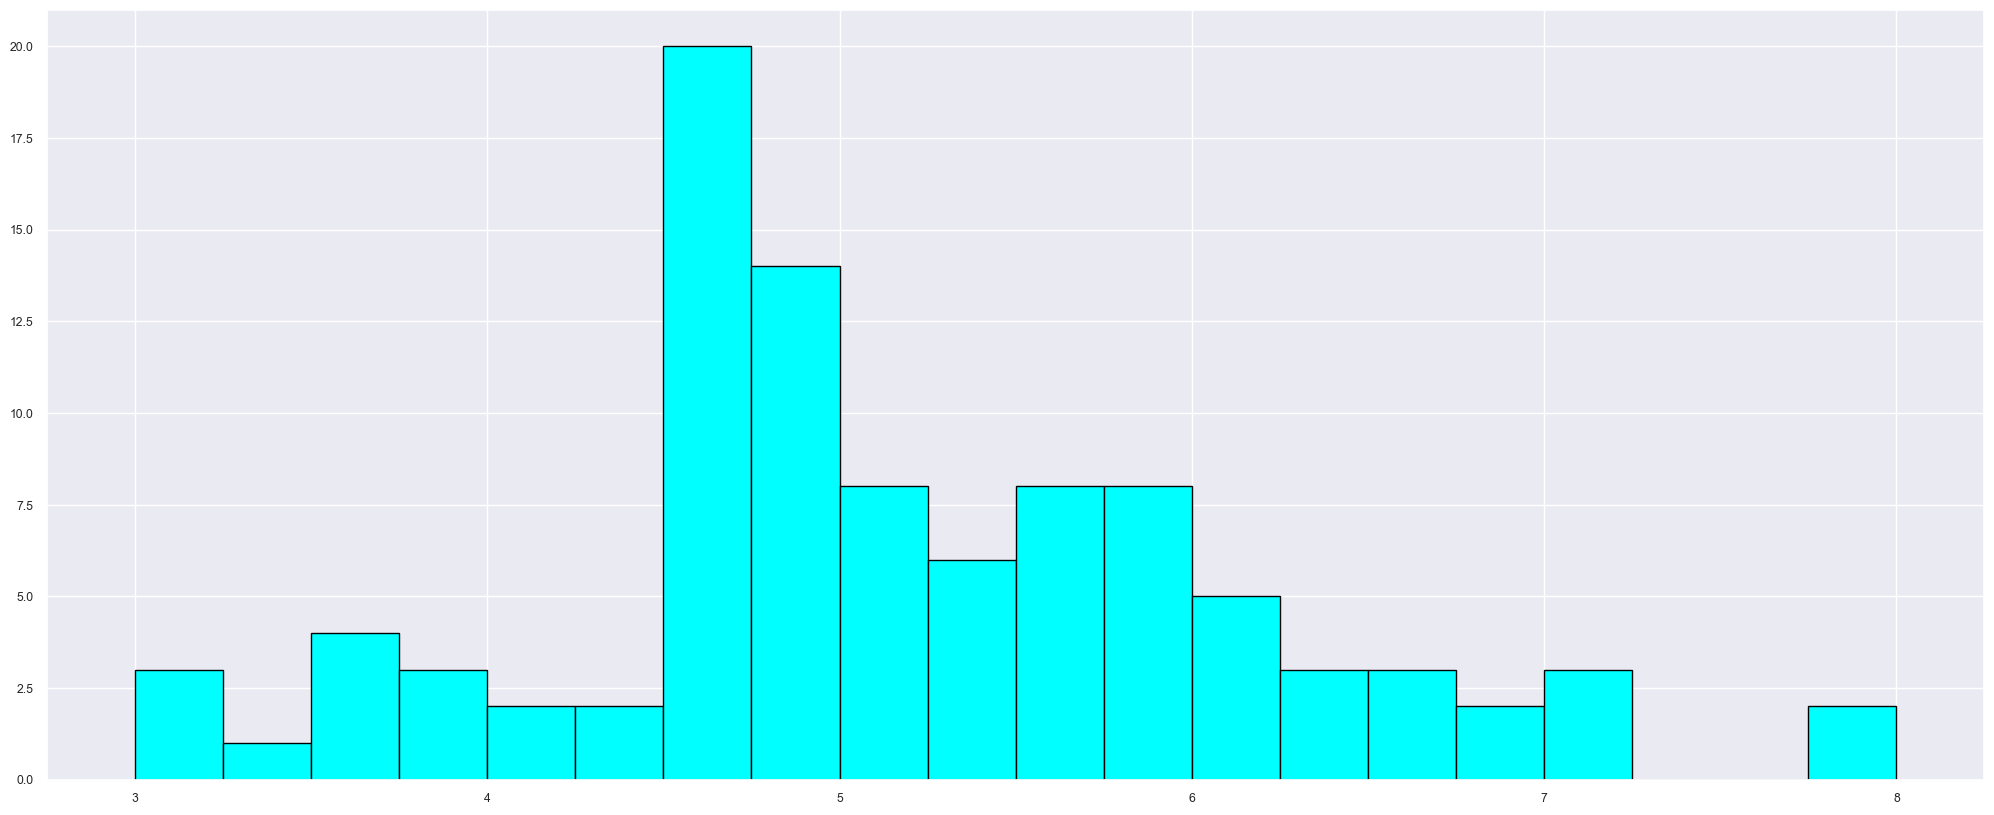

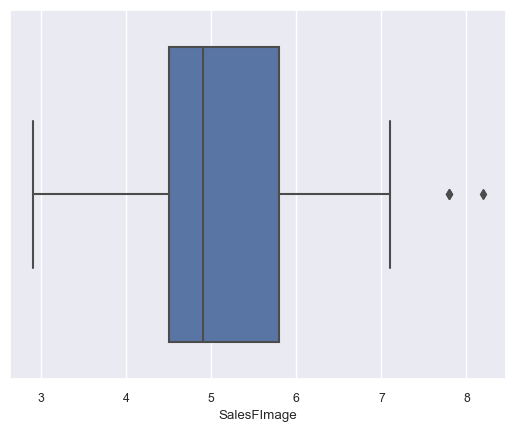

Description of ComPricing
----------------------------------------------------------------------------
count    100.000000
mean       6.974000
std        1.545055
min        3.700000
25%        5.875000
50%        7.100000
75%        8.400000
max        9.900000
Name: ComPricing, dtype: float64 Distribution of ComPricing
----------------------------------------------------------------------------
BoxPlot of ComPricing
----------------------------------------------------------------------------


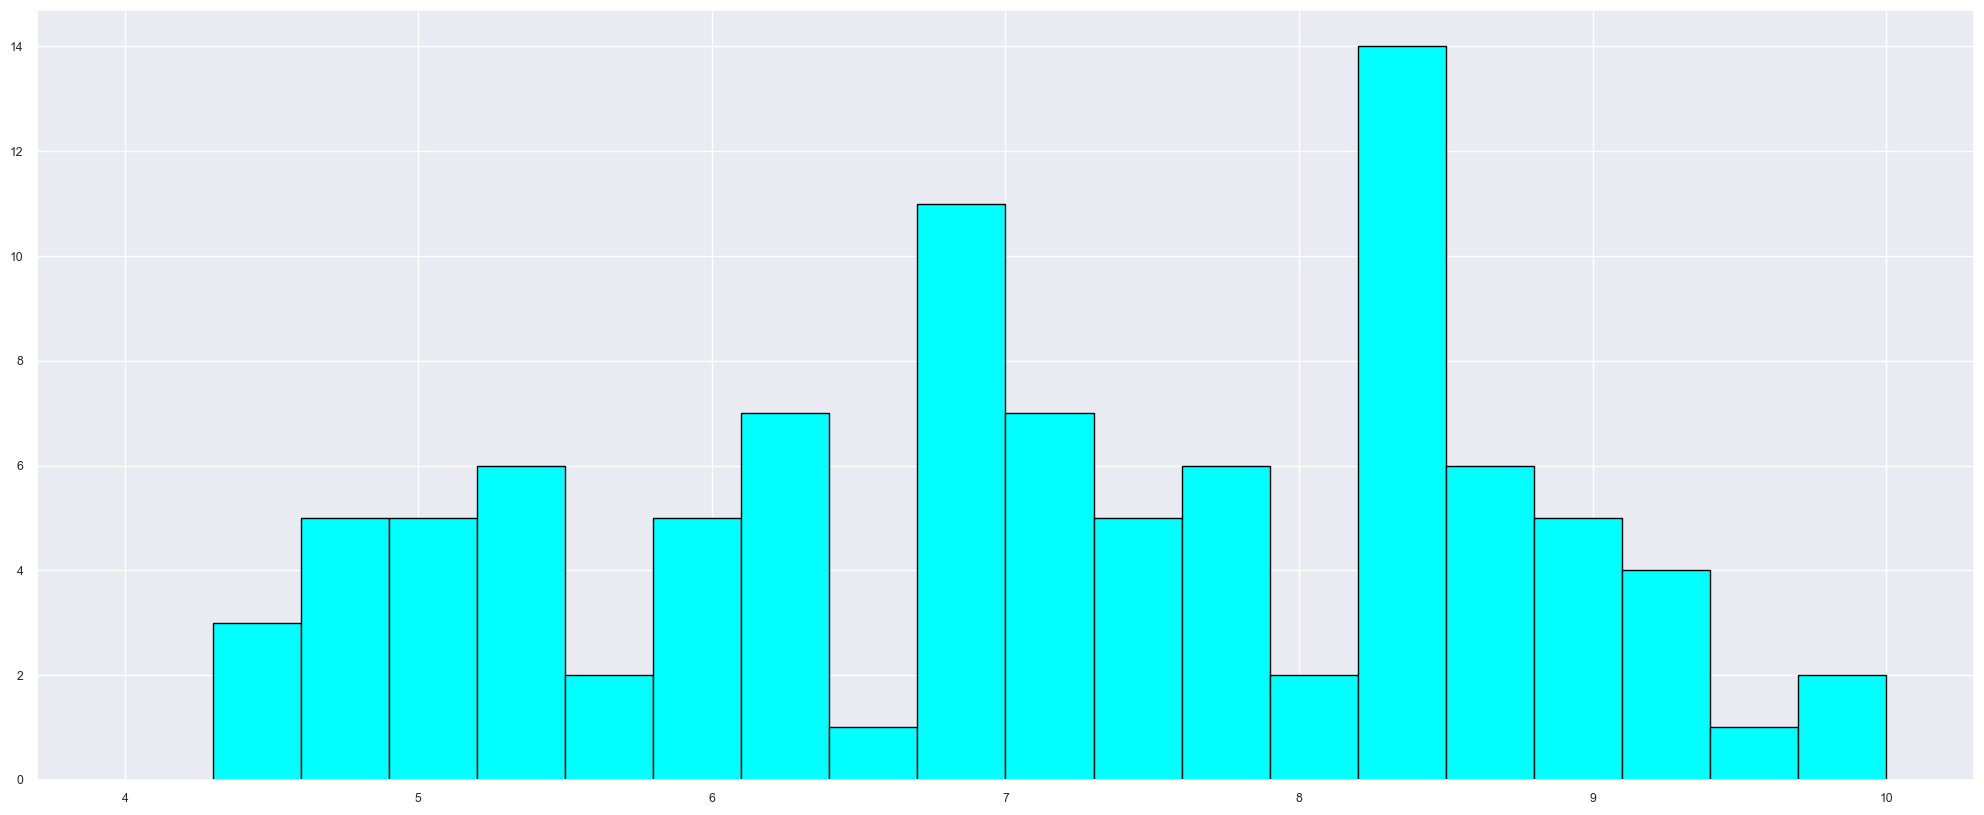

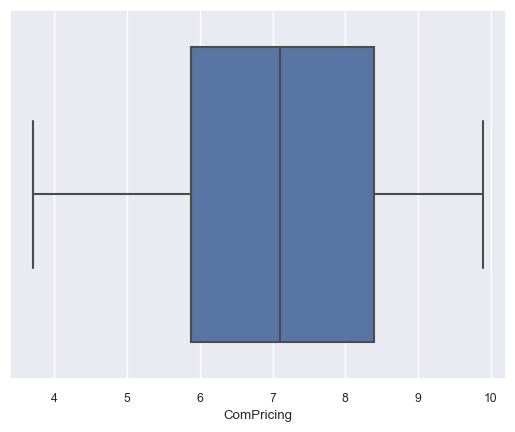

Description of WartyClaim
----------------------------------------------------------------------------
count    100.000000
mean       6.043000
std        0.819738
min        4.100000
25%        5.400000
50%        6.100000
75%        6.600000
max        8.100000
Name: WartyClaim, dtype: float64 Distribution of WartyClaim
----------------------------------------------------------------------------
BoxPlot of WartyClaim
----------------------------------------------------------------------------


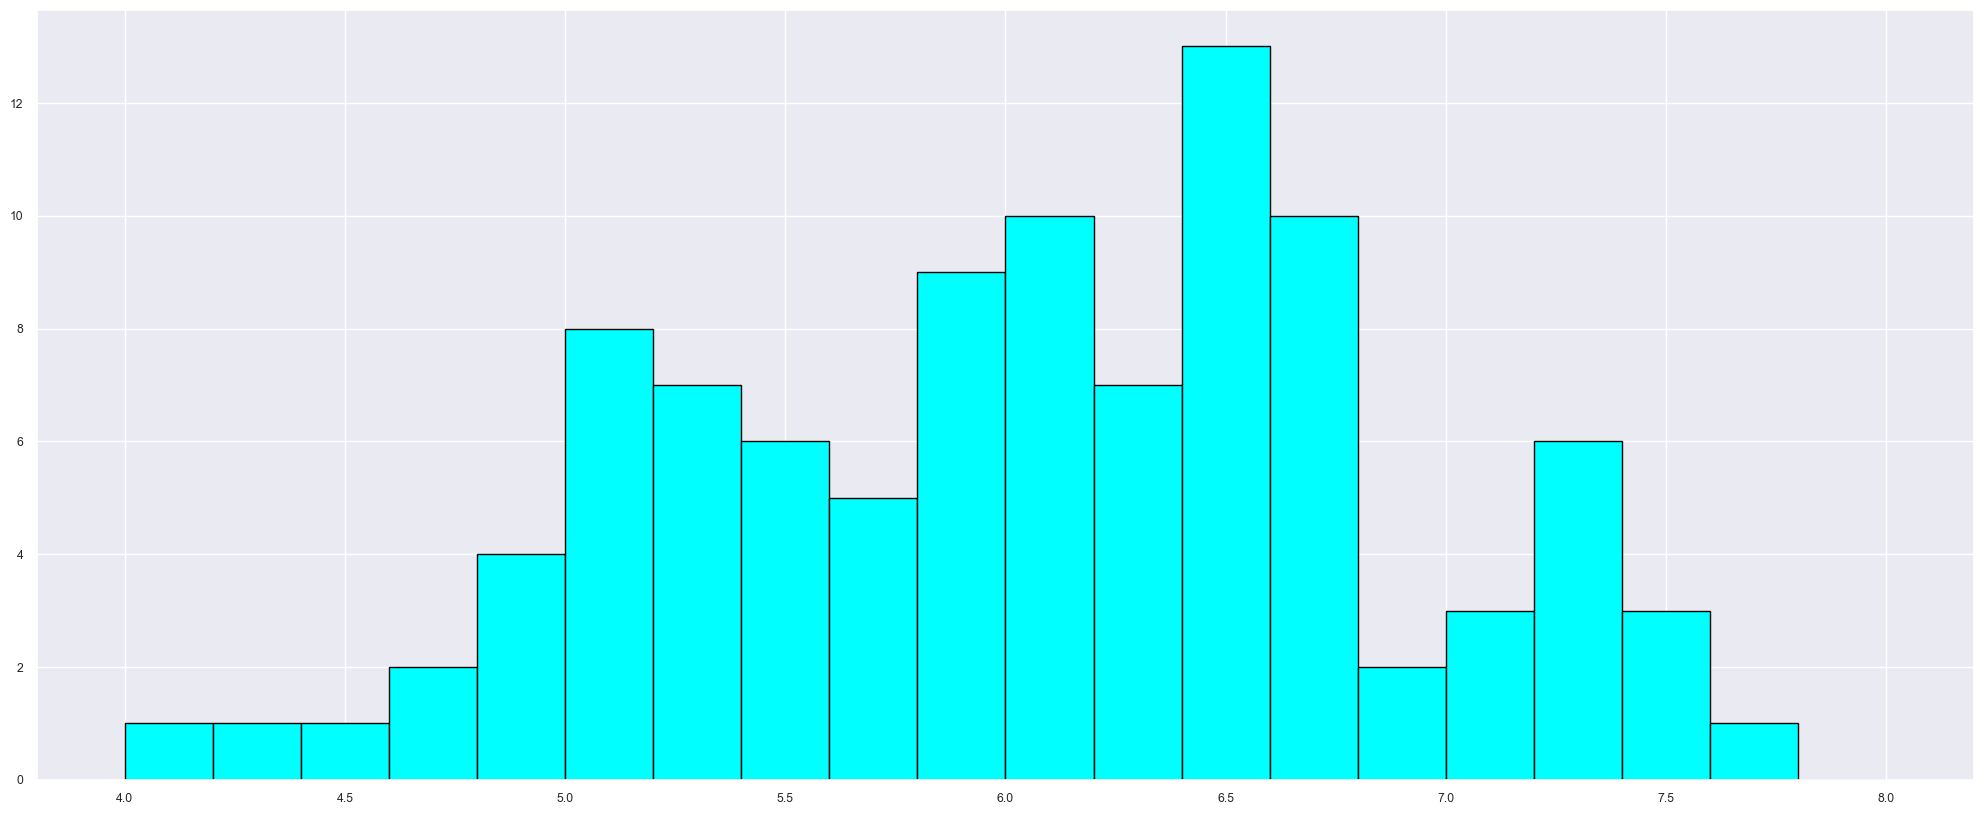

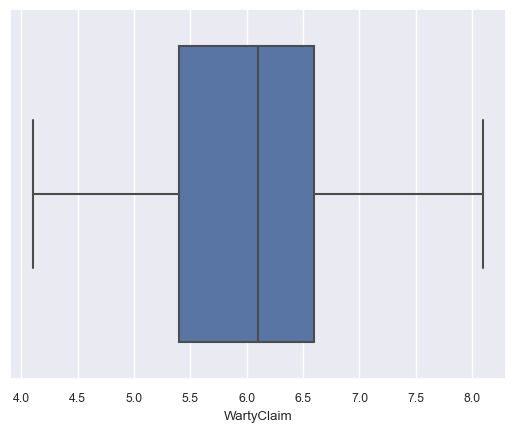

Description of OrdBilling
----------------------------------------------------------------------------
count    100.00000
mean       4.27800
std        0.92884
min        2.00000
25%        3.70000
50%        4.40000
75%        4.80000
max        6.70000
Name: OrdBilling, dtype: float64 Distribution of OrdBilling
----------------------------------------------------------------------------
BoxPlot of OrdBilling
----------------------------------------------------------------------------


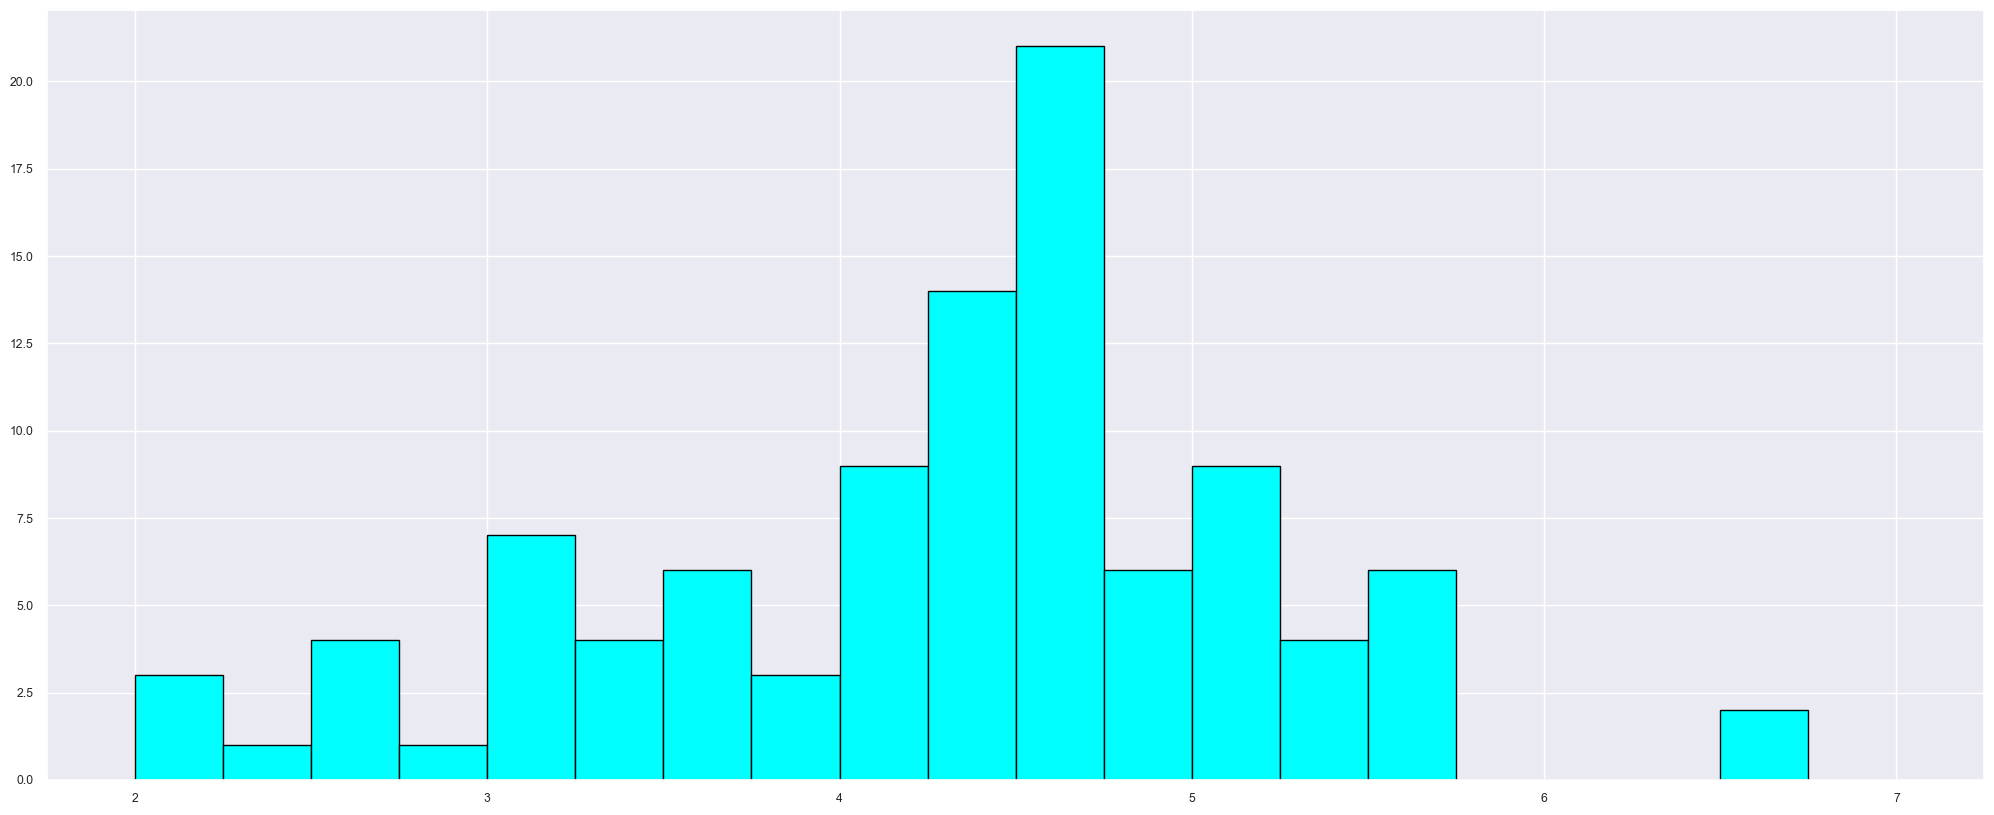

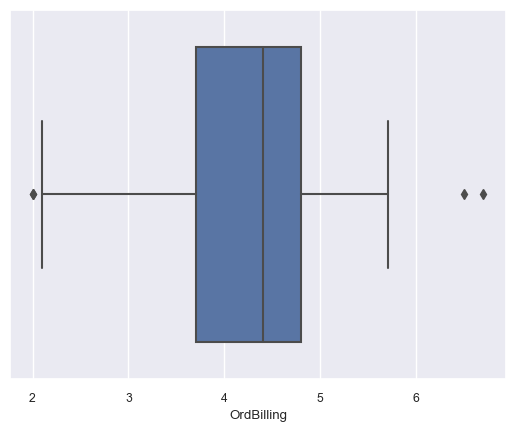

Description of DelSpeed
----------------------------------------------------------------------------
count    100.000000
mean       3.886000
std        0.734437
min        1.600000
25%        3.400000
50%        3.900000
75%        4.425000
max        5.500000
Name: DelSpeed, dtype: float64 Distribution of DelSpeed
----------------------------------------------------------------------------
BoxPlot of DelSpeed
----------------------------------------------------------------------------


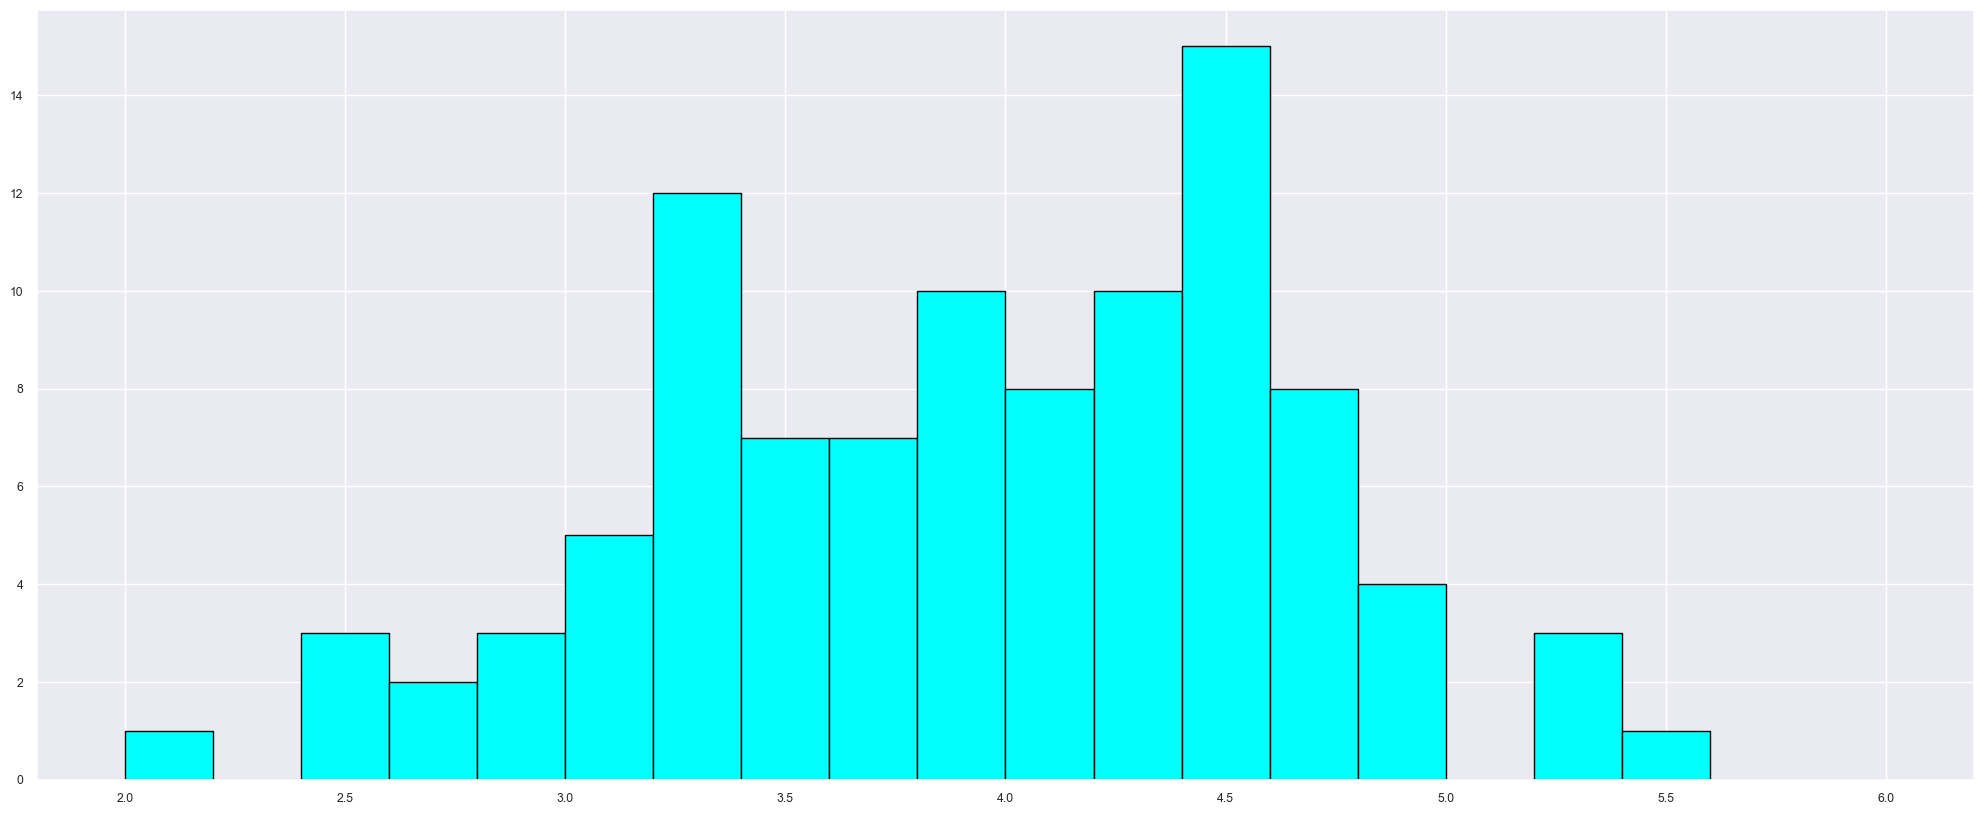

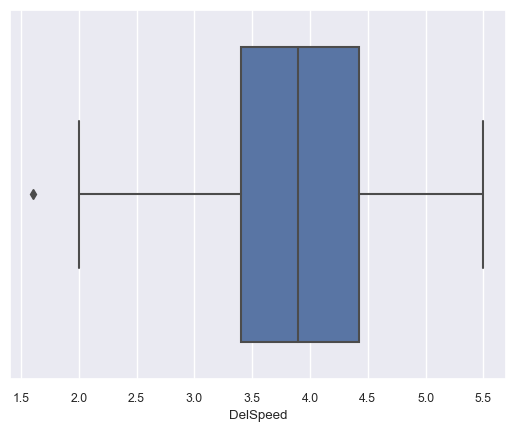

Description of Satisfaction
----------------------------------------------------------------------------
count    100.000000
mean       6.918000
std        1.191839
min        4.700000
25%        6.000000
50%        7.050000
75%        7.625000
max        9.900000
Name: Satisfaction, dtype: float64 Distribution of Satisfaction
----------------------------------------------------------------------------
BoxPlot of Satisfaction
----------------------------------------------------------------------------


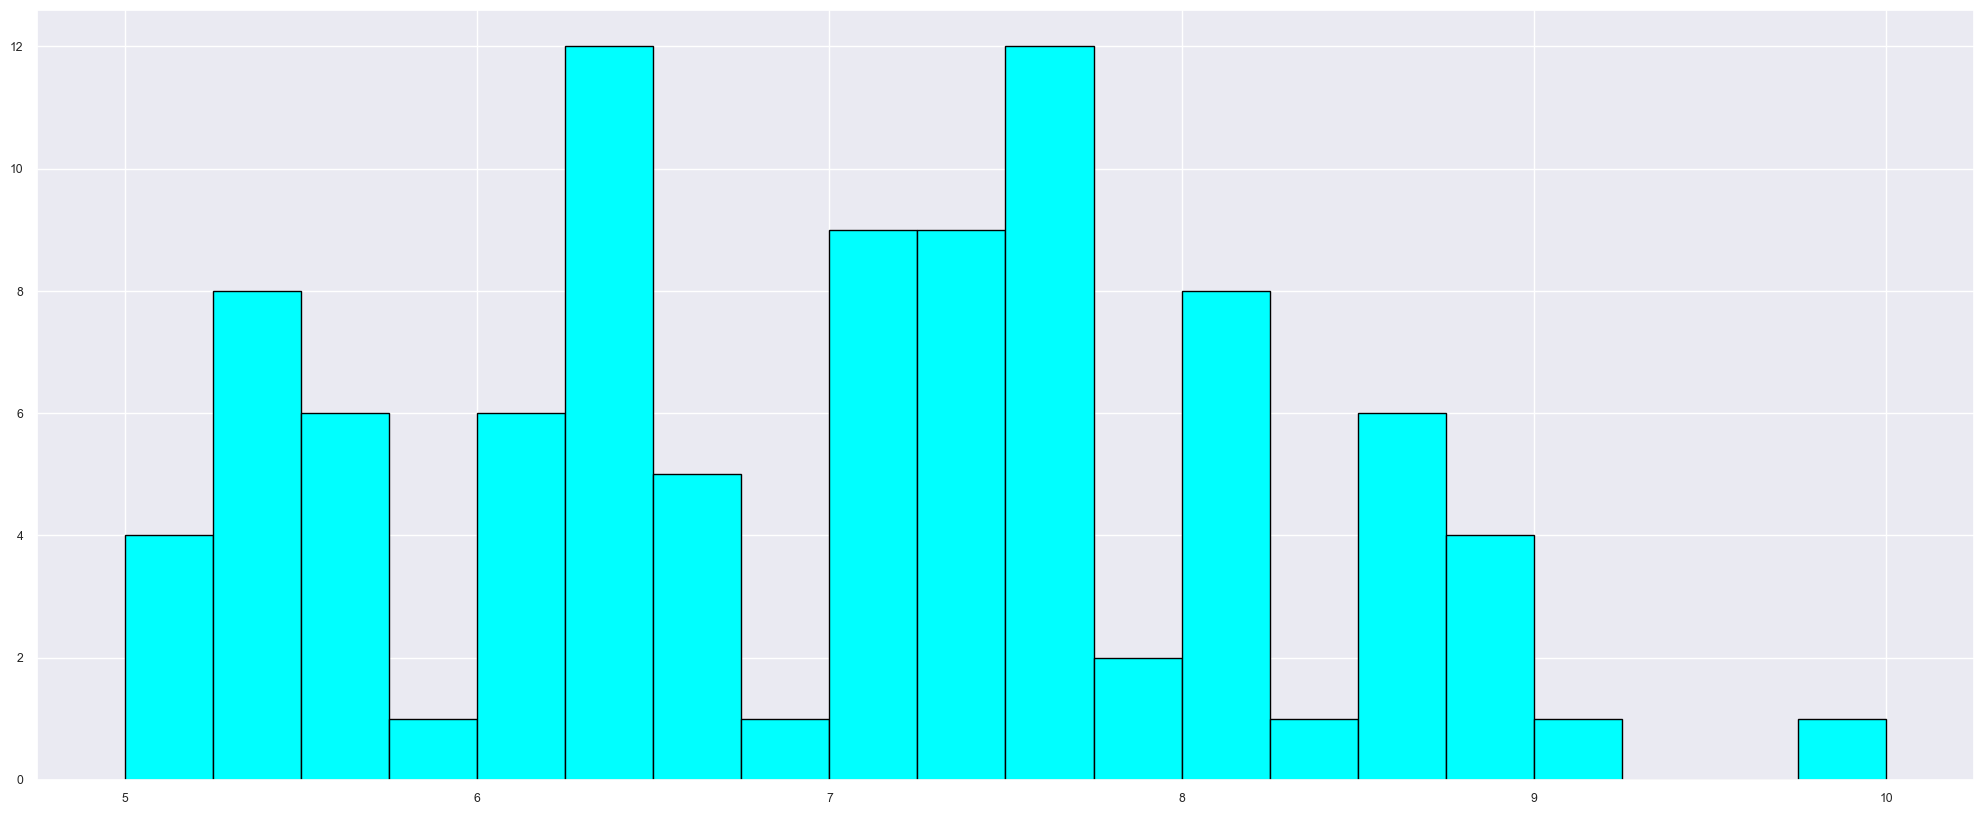

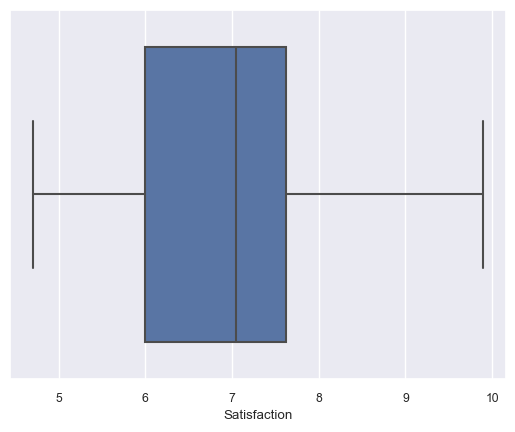

In [61]:
 for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

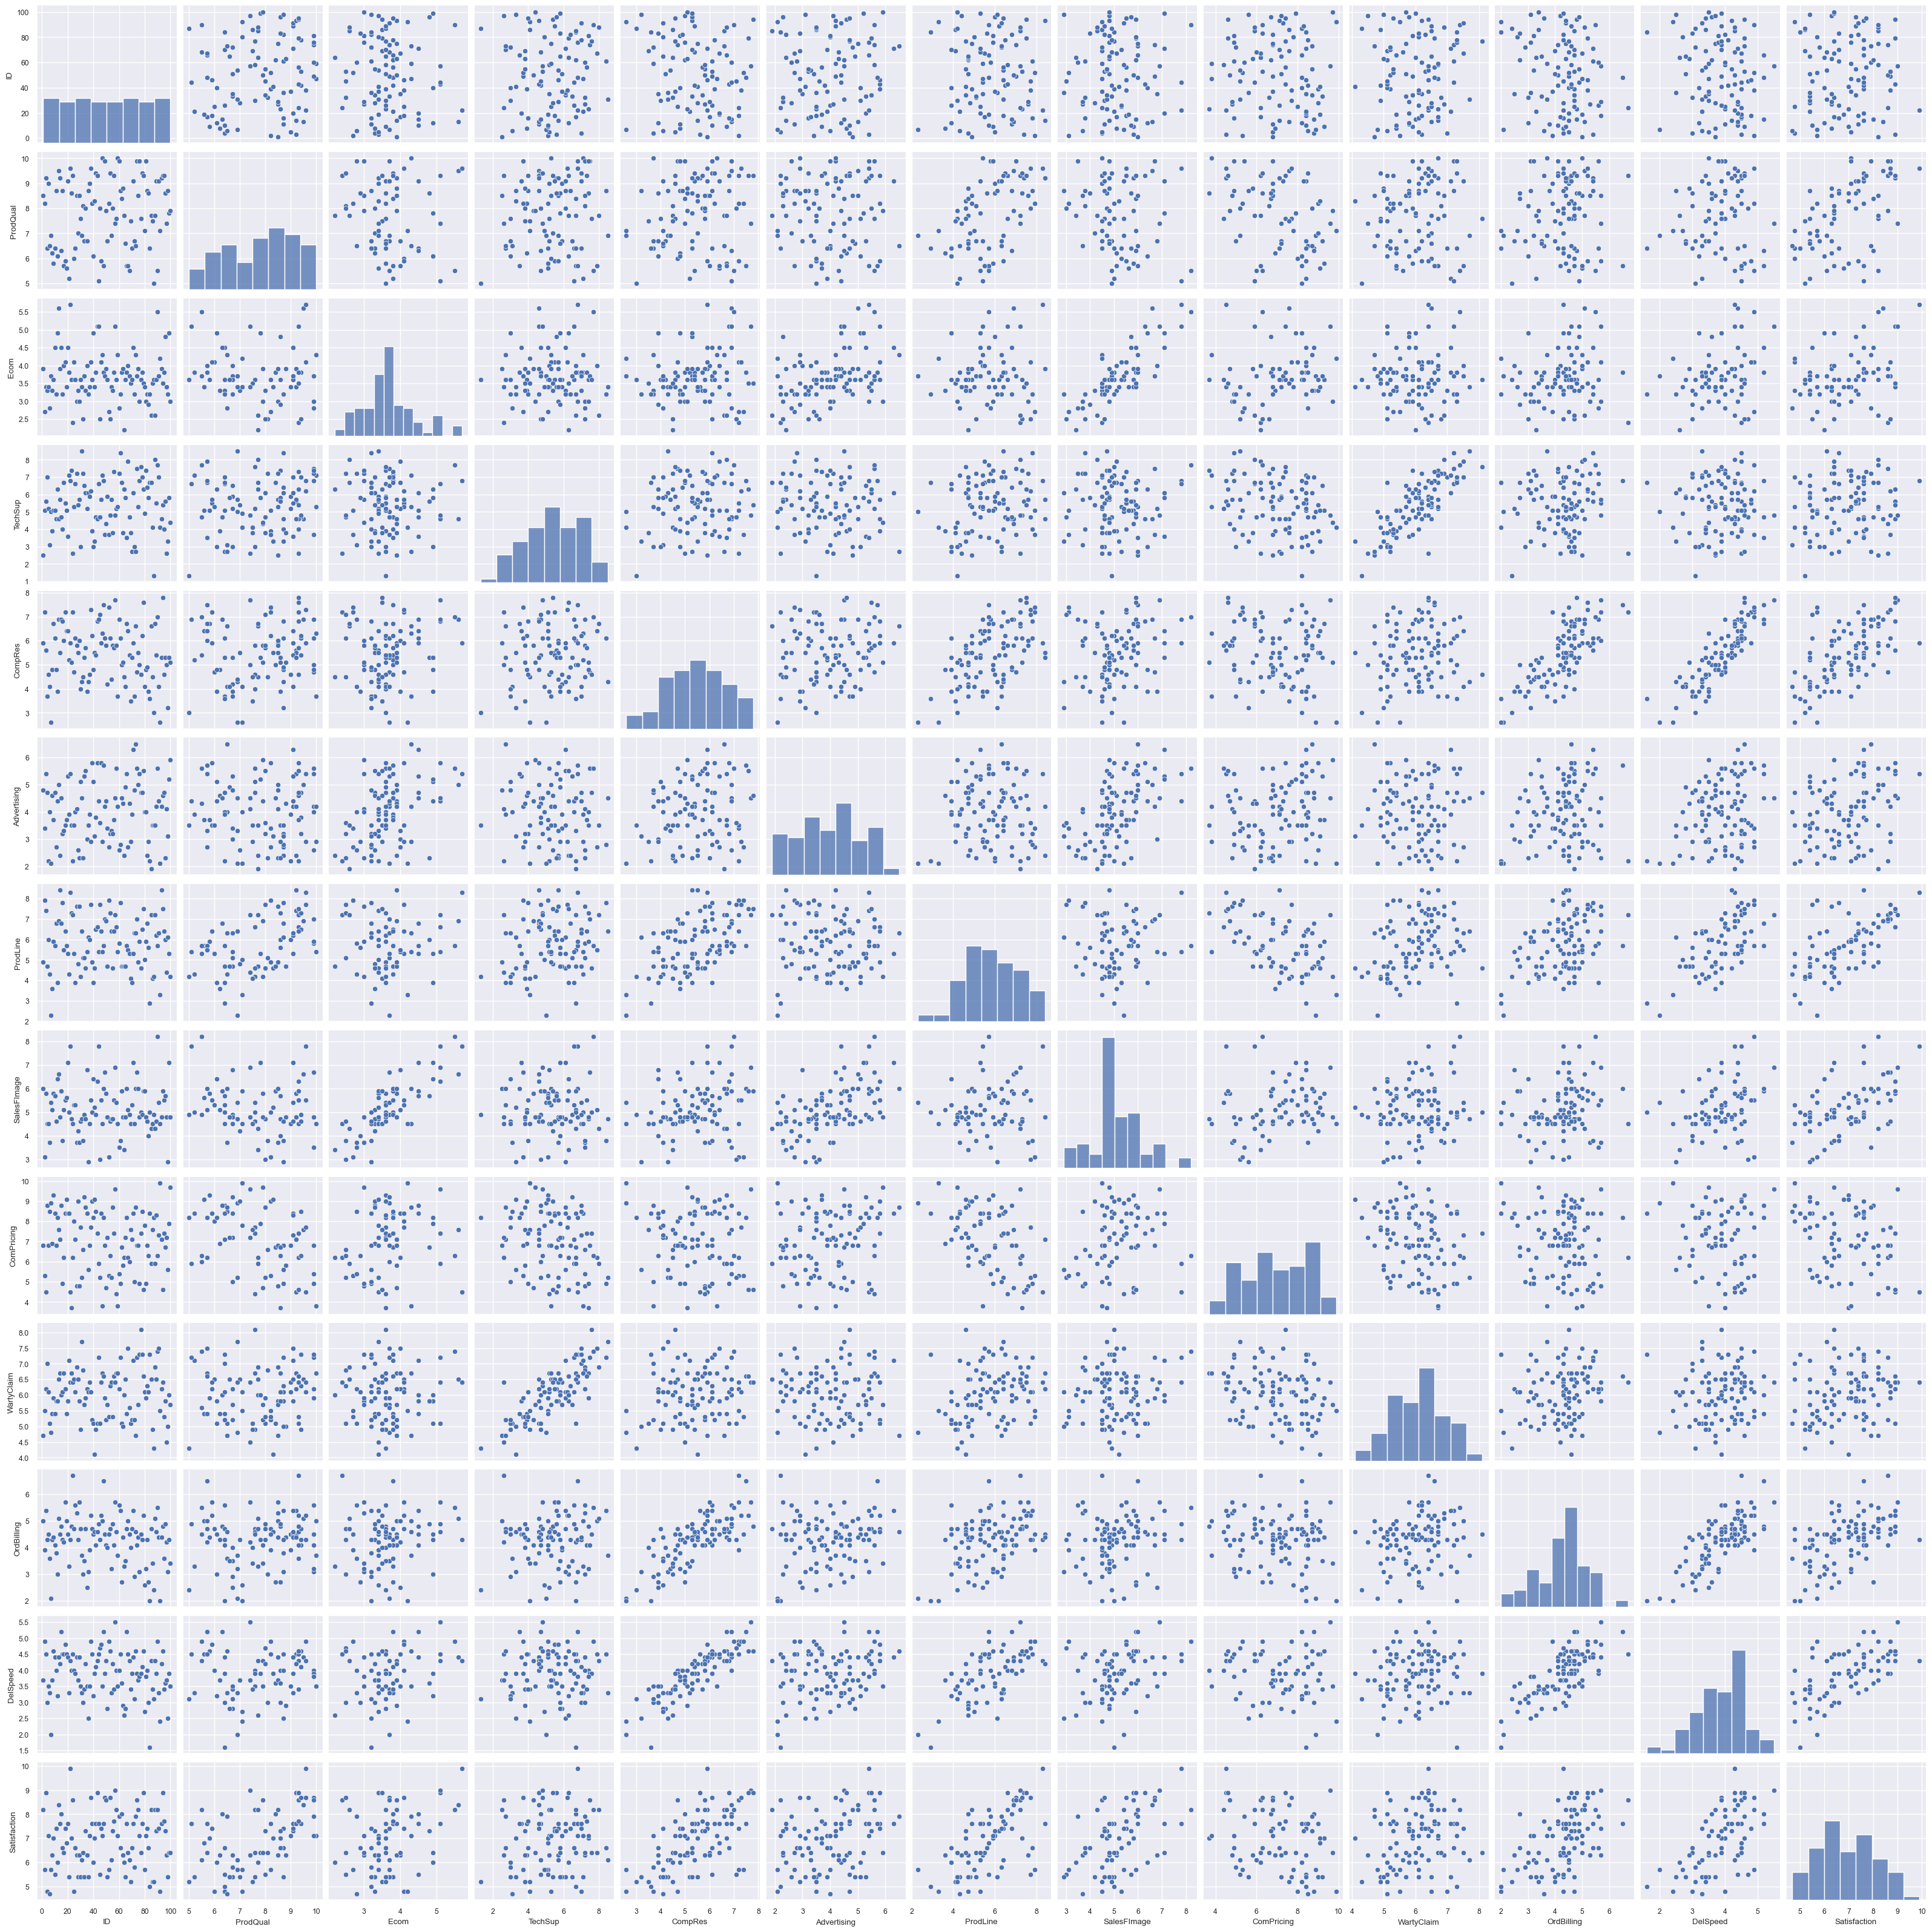

In [56]:
for i in range(0, len(data_num.columns),14):
    sns.pairplot(data=data_num,x_vars=data_num.columns[i:i+14])


In [20]:
corr = data_num.corr(method='pearson')

In [21]:
np.ones_like(corr, dtype=np.bool)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [ True,  True,  True,

In [22]:
np.triu(np.ones_like(corr, dtype=np.bool))

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True],
       [False, False, False,

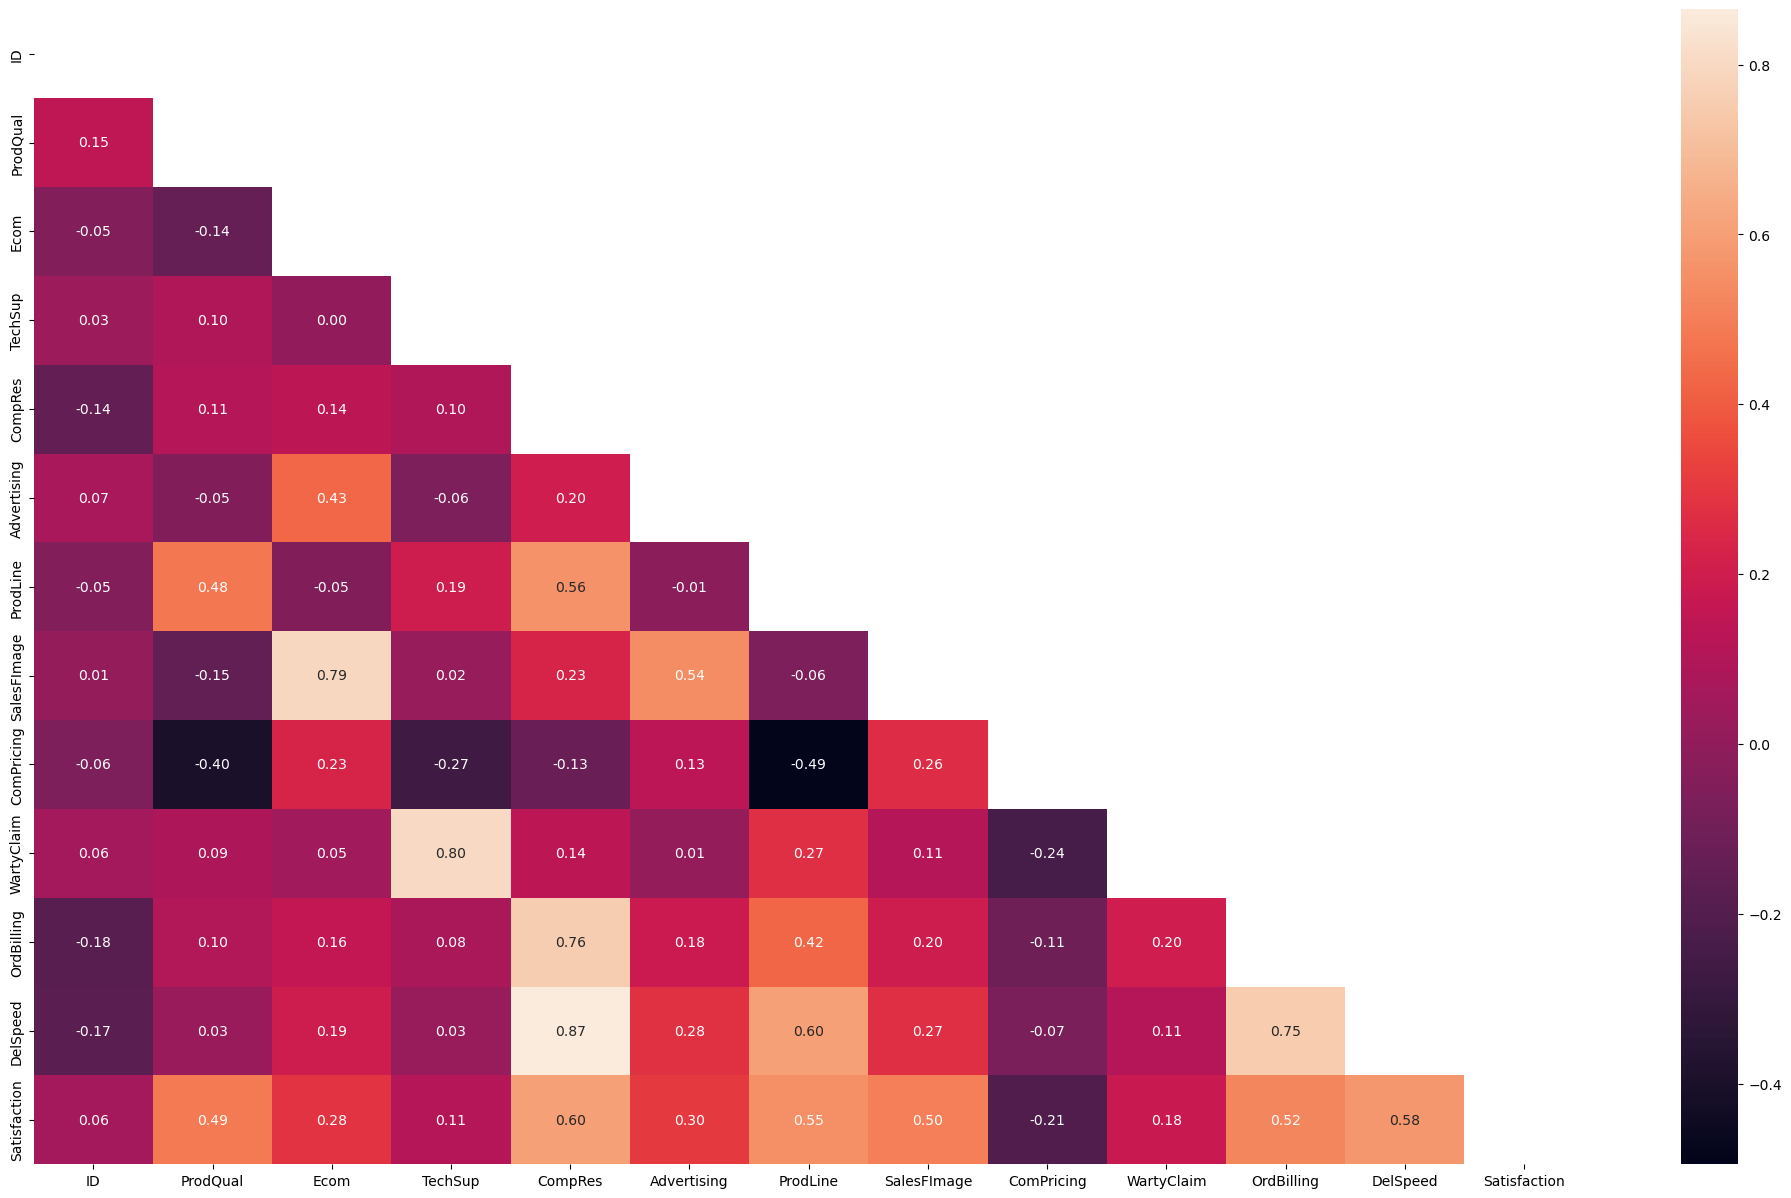

In [23]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(data_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

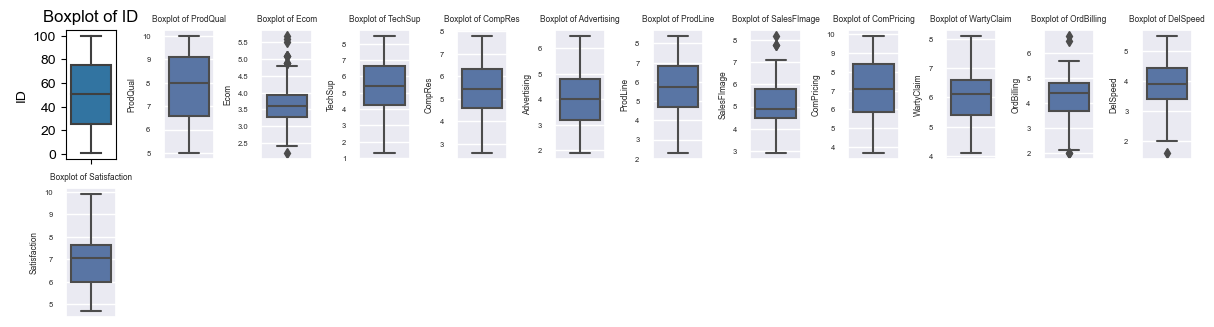

In [24]:
plt.figure(figsize = (12,8))
feature_list = data.columns
for i in range(len(feature_list)):
    plt.subplot(5, 12, i + 1)
    sns.boxplot(y = data[feature_list[i]], data = data)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()
    sns.set(font_scale=0.5);

In [25]:
q1 = data.quantile(0.25)
q2 = data.quantile(0.75)

In [26]:
IQR = q2 - q1

In [27]:
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR)

In [28]:
data.columns

Index(['ID', 'ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising',
       'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling',
       'DelSpeed', 'Satisfaction'],
      dtype='object')

In [29]:
data_new = pd.DataFrame(np.where(data > max_limit, max_limit, 
         (np.where(data < min_limit, min_limit, data))),columns=['ID', 'ProdQual', 'Ecom', 'TechSup', 'CompRes', 'Advertising',
       'ProdLine', 'SalesFImage', 'ComPricing', 'WartyClaim', 'OrdBilling',
       'DelSpeed', 'Satisfaction'])

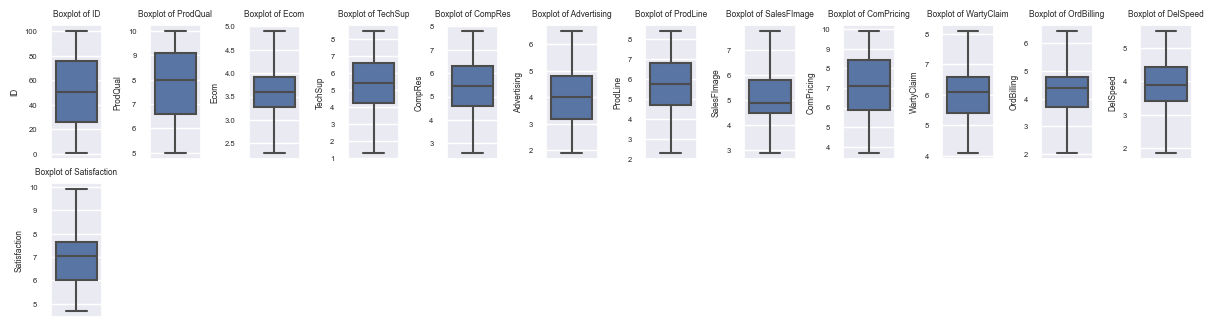

In [30]:
plt.figure(figsize = (12,8))
feature_list = data_new.columns
for i in range(len(feature_list)):
    plt.subplot(5, 12, i + 1)
    sns.boxplot(y = data_new[feature_list[i]], data = data_new)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()
    sns.set(font_scale=0.5);

In [31]:
data_new.describe()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,7.810000,3.64600,5.365000,5.442000,4.010000,5.805000,5.117500,6.974000,6.043000,4.276000,3.888625,6.918000
std,29.011492,1.396279,0.63555,1.530457,1.208403,1.126943,1.315285,1.057617,1.545055,0.819738,0.918895,0.726612,1.191839
min,1.000000,5.000000,2.30000,1.300000,2.600000,1.900000,2.300000,2.900000,3.700000,4.100000,2.050000,1.862500,4.700000
25%,25.750000,6.575000,3.27500,4.250000,4.600000,3.175000,4.700000,4.500000,5.875000,5.400000,3.700000,3.400000,6.000000
50%,50.500000,8.000000,3.60000,5.400000,5.450000,4.000000,5.750000,4.900000,7.100000,6.100000,4.400000,3.900000,7.050000
75%,75.250000,9.100000,3.92500,6.625000,6.325000,4.800000,6.800000,5.800000,8.400000,6.600000,4.800000,4.425000,7.625000
max,100.000000,10.000000,4.90000,8.500000,7.800000,6.500000,8.400000,7.750000,9.900000,8.100000,6.450000,5.500000,9.900000


In [32]:
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data_new), columns=data_new.columns)

In [33]:
data_scaled.head()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,-1.714816,0.496660,0.401668,-1.881421,0.380922,0.704543,-0.691530,0.838627,-0.113185,-1.646582,0.791872,-0.260903,1.081067
1,-1.680173,0.280721,-1.495974,-0.174023,1.462141,-0.544014,1.600835,-1.917200,-1.088915,-0.665744,-0.411249,1.398918,-1.027098
2,-1.645531,1.000518,-0.389017,0.154322,0.131410,1.239639,1.218774,0.648570,-1.609304,0.192489,1.229371,0.845644,1.671354
3,-1.610888,-1.014914,-0.547153,1.073690,-1.448834,0.615361,-0.844354,-0.586801,1.187789,1.173327,0.026250,-1.229132,-1.786038
4,-1.576245,0.856559,-0.389017,-0.108354,-0.700298,-1.614207,0.149004,-0.586801,-0.113185,0.069885,0.244999,-0.537540,0.153474


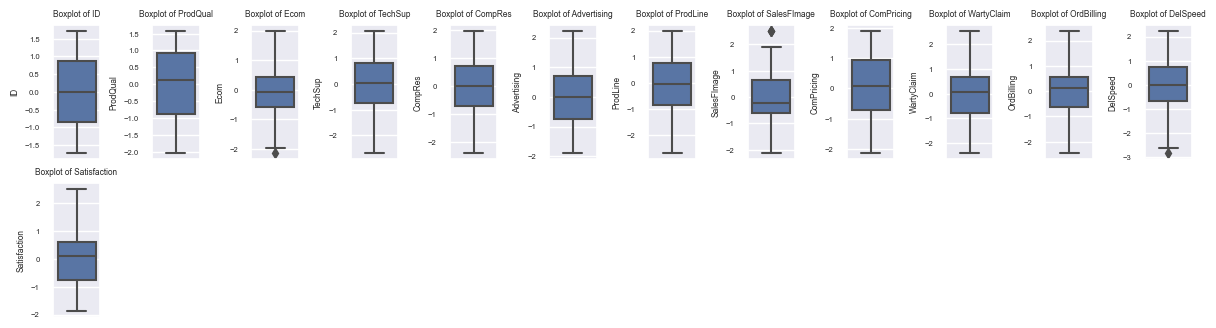

In [34]:
plt.figure(figsize = (12,8))
feature_list = data_scaled.columns
for i in range(len(feature_list)):
    plt.subplot(5, 12, i + 1)
    sns.boxplot(y = data_scaled[feature_list[i]], data = data_scaled)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [35]:
data_scaled.describe()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,4.440892e-18,9.188483e-16,7.216450e-16,1.029177e-15,-1.432188e-16,-6.061818e-16,2.531308e-16,2.592371e-16,-7.105427e-16,-1.247891e-15,2.220446e-16,9.037215e-16,1.296740e-15
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-1.714816e+00,-2.022630e+00,-2.128522e+00,-2.669451e+00,-2.363712e+00,-1.881755e+00,-2.678246e+00,-2.107257e+00,-2.129693e+00,-2.382210e+00,-2.434679e+00,-2.802505e+00,-1.870365e+00
25%,-8.574080e-01,-8.889494e-01,-5.866876e-01,-7.322109e-01,-7.002976e-01,-7.446754e-01,-8.443545e-01,-5.868010e-01,-7.148848e-01,-7.883484e-01,-6.299979e-01,-6.758585e-01,-7.741184e-01
50%,0.000000e+00,1.367614e-01,-7.274293e-02,2.298420e-02,6.653659e-03,-8.918268e-03,-4.202669e-02,-2.066870e-01,8.196131e-02,6.988470e-02,1.356245e-01,1.573372e-02,1.113111e-01
75%,8.574080e-01,9.285383e-01,4.412017e-01,8.274312e-01,7.343976e-01,7.045432e-01,7.603011e-01,6.485695e-01,9.275939e-01,6.829084e-01,5.731231e-01,7.419056e-01,5.961892e-01
max,1.714816e+00,1.576356e+00,1.983036e+00,2.058728e+00,1.961166e+00,2.220649e+00,1.982896e+00,2.501625e+00,1.903324e+00,2.521979e+00,2.377804e+00,2.228829e+00,2.514620e+00


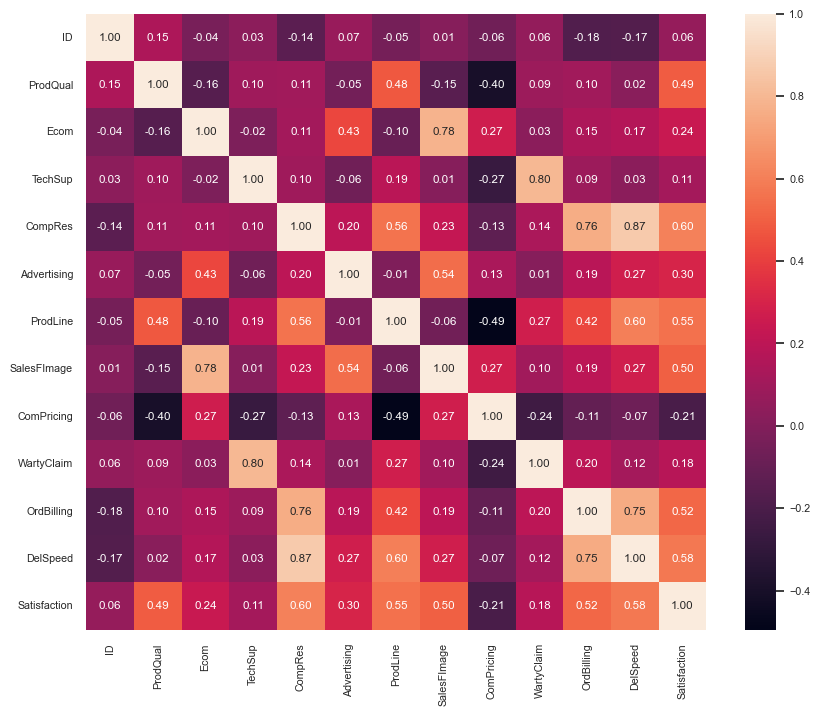

In [36]:
#Check for presence of correlations
plt.figure(figsize = (10,8))
sns.set(font_scale=0.7)
sns.heatmap(data_scaled.corr(), annot=True,fmt='.2f');

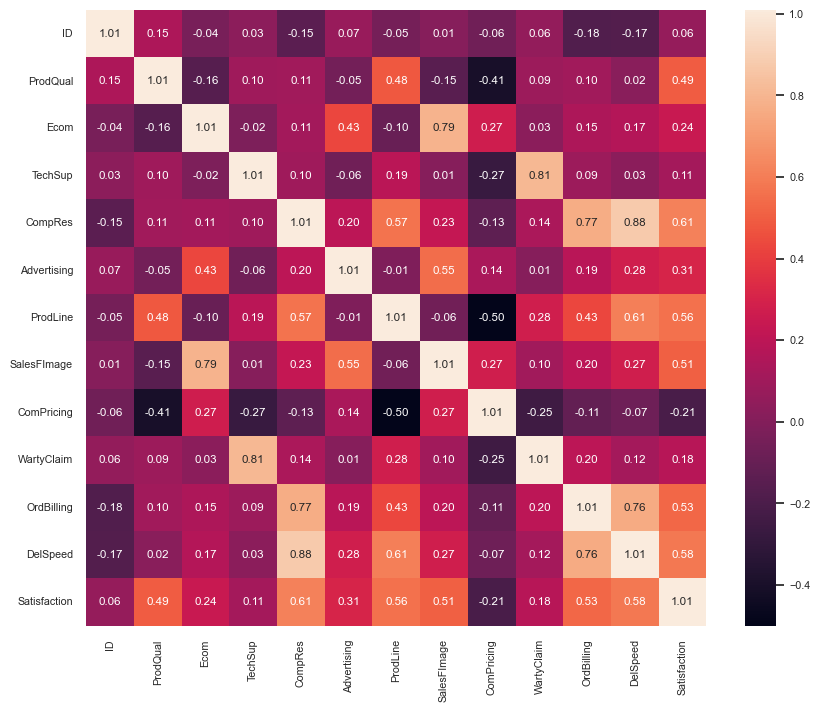

In [62]:
#Check for presence of covariance
plt.figure(figsize = (10,8))
sns.set(font_scale=0.7)
sns.heatmap(data_scaled.cov(), annot=True,fmt='.2f');

In [63]:
data_scaled.cov()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ID,1.010101,0.147247,-0.035803,0.032160,-0.145780,0.073868,-0.049132,0.008854,-0.063643,0.059184,-0.178085,-0.171489,0.061761
ProdQual,0.147247,1.010101,-0.163220,0.096566,0.107444,-0.054013,0.482317,-0.147978,-0.405335,0.089204,0.103531,0.024577,0.491237
Ecom,-0.035803,-0.163220,1.010101,-0.018976,0.110490,0.429417,-0.097316,0.787115,0.270772,0.027657,0.147985,0.169845,0.244305
TechSup,0.032160,0.096566,-0.018976,1.010101,0.097633,-0.063505,0.194571,0.009936,-0.273522,0.805220,0.086307,0.029190,0.113735
CompRes,-0.145780,0.107444,0.110490,0.097633,1.010101,0.198906,0.567088,0.228937,-0.129247,0.141827,0.765652,0.877623,0.609356
Advertising,0.073868,-0.054013,0.429417,-0.063505,0.198906,1.010101,-0.011667,0.548407,0.135573,0.010901,0.189904,0.275730,0.307747
ProdLine,-0.049132,0.482317,-0.097316,0.194571,0.567088,-0.011667,1.010101,-0.063216,-0.499948,0.275836,0.428152,0.606336,0.556107
SalesFImage,0.008854,-0.147978,0.787115,0.009936,0.228937,0.548407,-0.063216,1.010101,0.273986,0.101972,0.196662,0.273952,0.506129
ComPricing,-0.063643,-0.405335,0.270772,-0.273522,-0.129247,0.135573,-0.499948,0.273986,1.010101,-0.247461,-0.114463,-0.070999,-0.210400
WartyClaim,0.059184,0.089204,0.027657,0.805220,0.141827,0.010901,0.275836,0.101972,-0.247461,1.010101,0.200107,0.117342,0.179338


In [64]:
data_scaled.corr()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ID,1.000000,0.145774,-0.035445,0.031838,-0.144322,0.073129,-0.048641,0.008765,-0.063007,0.058592,-0.176304,-0.169774,0.061143
ProdQual,0.145774,1.000000,-0.161588,0.095600,0.106370,-0.053473,0.477493,-0.146498,-0.401282,0.088312,0.102495,0.024332,0.486325
Ecom,-0.035445,-0.161588,1.000000,-0.018786,0.109386,0.425123,-0.096342,0.779244,0.268064,0.027380,0.146505,0.168147,0.241862
TechSup,0.031838,0.095600,-0.018786,1.000000,0.096657,-0.062870,0.192625,0.009836,-0.270787,0.797168,0.085443,0.028898,0.112597
CompRes,-0.144322,0.106370,0.109386,0.096657,1.000000,0.196917,0.561417,0.226647,-0.127954,0.140408,0.757995,0.868846,0.603263
Advertising,0.073129,-0.053473,0.425123,-0.062870,0.196917,1.000000,-0.011551,0.542923,0.134217,0.010792,0.188005,0.272973,0.304669
ProdLine,-0.048641,0.477493,-0.096342,0.192625,0.561417,-0.011551,1.000000,-0.062584,-0.494948,0.273078,0.423870,0.600272,0.550546
SalesFImage,0.008765,-0.146498,0.779244,0.009836,0.226647,0.542923,-0.062584,1.000000,0.271246,0.100953,0.194695,0.271213,0.501068
ComPricing,-0.063007,-0.401282,0.268064,-0.270787,-0.127954,0.134217,-0.494948,0.271246,1.000000,-0.244986,-0.113318,-0.070289,-0.208296
WartyClaim,0.058592,0.088312,0.027380,0.797168,0.140408,0.010792,0.273078,0.100953,-0.244986,1.000000,0.198106,0.116168,0.177545


In [37]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(data_scaled)
p_value

6.813866448568822e-116

In [38]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(data_scaled)
kmo_model

0.6608581001716486

In [39]:
data_scaled.cov()

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
ID,1.010101,0.147247,-0.035803,0.032160,-0.145780,0.073868,-0.049132,0.008854,-0.063643,0.059184,-0.178085,-0.171489,0.061761
ProdQual,0.147247,1.010101,-0.163220,0.096566,0.107444,-0.054013,0.482317,-0.147978,-0.405335,0.089204,0.103531,0.024577,0.491237
Ecom,-0.035803,-0.163220,1.010101,-0.018976,0.110490,0.429417,-0.097316,0.787115,0.270772,0.027657,0.147985,0.169845,0.244305
TechSup,0.032160,0.096566,-0.018976,1.010101,0.097633,-0.063505,0.194571,0.009936,-0.273522,0.805220,0.086307,0.029190,0.113735
CompRes,-0.145780,0.107444,0.110490,0.097633,1.010101,0.198906,0.567088,0.228937,-0.129247,0.141827,0.765652,0.877623,0.609356
Advertising,0.073868,-0.054013,0.429417,-0.063505,0.198906,1.010101,-0.011667,0.548407,0.135573,0.010901,0.189904,0.275730,0.307747
ProdLine,-0.049132,0.482317,-0.097316,0.194571,0.567088,-0.011667,1.010101,-0.063216,-0.499948,0.275836,0.428152,0.606336,0.556107
SalesFImage,0.008854,-0.147978,0.787115,0.009936,0.228937,0.548407,-0.063216,1.010101,0.273986,0.101972,0.196662,0.273952,0.506129
ComPricing,-0.063643,-0.405335,0.270772,-0.273522,-0.129247,0.135573,-0.499948,0.273986,1.010101,-0.247461,-0.114463,-0.070999,-0.210400
WartyClaim,0.059184,0.089204,0.027657,0.805220,0.141827,0.010901,0.275836,0.101972,-0.247461,1.010101,0.200107,0.117342,0.179338


In [40]:
np.array(data_scaled.cov())

array([[ 1.01010101,  0.14724686, -0.03580259,  0.03215965, -0.14578025,
         0.07386793, -0.04913229,  0.00885361, -0.0636433 ,  0.05918424,
        -0.17808478, -0.17148892,  0.06176054],
       [ 0.14724686,  1.01010101, -0.16322019,  0.09656612,  0.10744445,
        -0.05401327,  0.48231658, -0.14797813, -0.40533524,  0.08920435,
         0.1035307 ,  0.02457729,  0.49123737],
       [-0.03580259, -0.16322019,  1.01010101, -0.01897569,  0.11049041,
         0.42941698, -0.09731551,  0.78711486,  0.27077209,  0.02765676,
         0.14798521,  0.16984515,  0.24430522],
       [ 0.03215965,  0.09656612, -0.01897569,  1.01010101,  0.09763293,
        -0.06350512,  0.19457117,  0.00993585, -0.2735219 ,  0.80522013,
         0.08630654,  0.0291897 ,  0.11373452],
       [-0.14578025,  0.10744445,  0.11049041,  0.09763293,  1.01010101,
         0.19890591,  0.56708783,  0.22893666, -0.12924672,  0.14182656,
         0.765652  ,  0.87762252,  0.60935617],
       [ 0.07386793, -0.054013

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13, random_state=1)
df_pca = pca.fit_transform(data_scaled)
df_pca.transpose().round(5)

array([[-0.56586, -0.63071, -2.82571, ...,  3.49688, -0.37464,  1.71423],
       [ 1.70985, -2.42464, -0.65132, ..., -1.91455,  2.34979,  1.1486 ],
       [ 2.06133,  2.49278,  0.36084, ...,  0.91591, -1.65412, -0.04677],
       ...,
       [ 0.15471,  0.58997, -0.61249, ..., -0.32142,  0.02187,  0.35806],
       [-0.34193,  0.20156,  0.20566, ..., -0.37353,  0.07347, -0.05393],
       [-0.09477,  0.17517,  0.14035, ..., -0.32605,  0.76264, -0.01157]])

In [42]:
df_pca.shape

(100, 13)

In [43]:
print('Eigen Vectors \n %s',pca.components_)

Eigen Vectors 
 %s [[ 4.62000728e-02 -1.58027218e-01 -1.39347642e-01 -1.25558836e-01
  -4.26608591e-01 -1.76000531e-01 -3.55715200e-01 -2.09925922e-01
   1.35540139e-01 -1.74756616e-01 -3.92818518e-01 -4.26486740e-01
  -4.11130831e-01]
 [-4.92986487e-02 -3.11729134e-01  4.51705349e-01 -2.38476094e-01
   1.05651742e-02  3.50505791e-01 -2.90553749e-01  4.59905998e-01
   4.17706010e-01 -2.01996322e-01  2.30352008e-02  6.48426938e-02
   2.38549586e-02]
 [-2.31074705e-01  6.06171213e-03 -2.42961427e-01 -5.75362555e-01
   2.10670802e-01 -1.36436961e-01  1.03155648e-01 -2.63464211e-01
   6.23167208e-02 -5.71736650e-01  1.72192934e-01  2.29051867e-01
  -2.37142718e-02]
 [ 4.98031848e-01  5.26361720e-01  8.21611606e-02 -2.86955669e-01
  -1.72431608e-01  2.10843618e-01  9.21428385e-02  1.35175834e-01
  -1.67593652e-01 -2.73014963e-01 -2.19362558e-01 -1.85250608e-01
   3.15912306e-01]
 [-7.86280201e-01  3.17591283e-01  2.75713175e-01 -1.07734443e-03
  -2.05117398e-01 -1.00017277e-01  9.63858666e-

In [44]:
pca.components_.shape

(13, 13)

In [45]:

var_exp = pca.explained_variance_ratio_
print(var_exp)

[0.30970772 0.19947116 0.13173491 0.10560417 0.06388796 0.04867791
 0.04155403 0.03094042 0.02550575 0.01804108 0.01105464 0.00747815
 0.00634211]


In [46]:
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained in Percentage:',(cum_var_exp*100).round(2))

Cumulative Variance Explained in Percentage: [ 30.97  50.92  64.09  74.65  81.04  85.91  90.06  93.16  95.71  97.51
  98.62  99.37 100.  ]


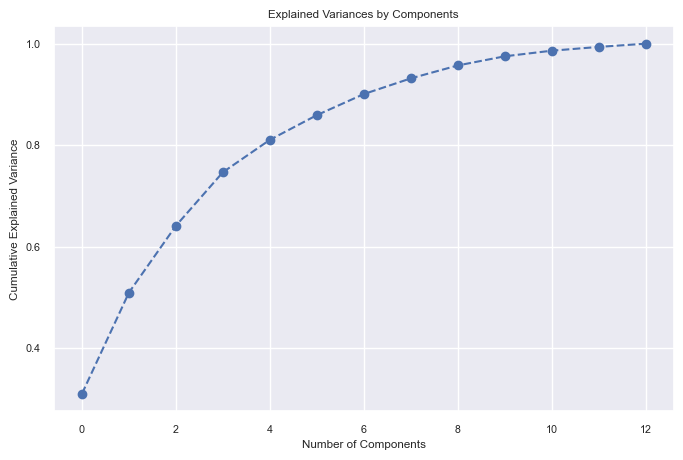

In [47]:
# visualize the explained variance by individual components
plt.figure(figsize = (8,5))
plt.plot(range(0,13), var_exp.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
sns.set(font_scale=1.8)
plt.show()

In [48]:
pca.components_

array([[ 4.62000728e-02, -1.58027218e-01, -1.39347642e-01,
        -1.25558836e-01, -4.26608591e-01, -1.76000531e-01,
        -3.55715200e-01, -2.09925922e-01,  1.35540139e-01,
        -1.74756616e-01, -3.92818518e-01, -4.26486740e-01,
        -4.11130831e-01],
       [-4.92986487e-02, -3.11729134e-01,  4.51705349e-01,
        -2.38476094e-01,  1.05651742e-02,  3.50505791e-01,
        -2.90553749e-01,  4.59905998e-01,  4.17706010e-01,
        -2.01996322e-01,  2.30352008e-02,  6.48426938e-02,
         2.38549586e-02],
       [-2.31074705e-01,  6.06171213e-03, -2.42961427e-01,
        -5.75362555e-01,  2.10670802e-01, -1.36436961e-01,
         1.03155648e-01, -2.63464211e-01,  6.23167208e-02,
        -5.71736650e-01,  1.72192934e-01,  2.29051867e-01,
        -2.37142718e-02],
       [ 4.98031848e-01,  5.26361720e-01,  8.21611606e-02,
        -2.86955669e-01, -1.72431608e-01,  2.10843618e-01,
         9.21428385e-02,  1.35175834e-01, -1.67593652e-01,
        -2.73014963e-01, -2.19362558e

In [49]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=12, random_state=123)
pca_transformed = pca.fit_transform(data_scaled)

In [50]:
pca.explained_variance_

array([4.06686907, 2.61931822, 1.72985238, 1.3867214 , 0.83893283,
       0.63920482, 0.54565893, 0.40628835, 0.33492402, 0.23690301,
       0.14516191, 0.0981979 ])

In [51]:
pca.explained_variance_ratio_

array([0.30970772, 0.19947116, 0.13173491, 0.10560417, 0.06388796,
       0.04867791, 0.04155403, 0.03094042, 0.02550575, 0.01804108,
       0.01105464, 0.00747815])

In [52]:
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12'],
                                    index =data_scaled.columns)

In [53]:
df_extracted_loadings 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
ID,0.046200,-0.049299,-0.231075,0.498032,-0.786280,-0.129093,-0.219561,0.012301,-0.089345,-0.023189,-0.033219,0.000188
ProdQual,-0.158027,-0.311729,0.006062,0.526362,0.317591,-0.254237,0.385338,0.152471,-0.303293,-0.167786,0.232317,0.197792
Ecom,-0.139348,0.451705,-0.242961,0.082161,0.275713,-0.109903,-0.432703,0.043870,-0.519890,-0.207306,0.029892,-0.001877
TechSup,-0.125559,-0.238476,-0.575363,-0.286956,-0.001077,-0.051248,0.124556,-0.003410,0.073852,-0.551308,-0.415346,0.000592
CompRes,-0.426609,0.010565,0.210671,-0.172432,-0.205117,-0.059507,-0.023714,-0.002732,0.125006,-0.440302,0.559335,-0.418546
Advertising,-0.176001,0.350506,-0.136437,0.210844,-0.100017,0.709514,0.489888,-0.061191,-0.114272,-0.038029,-0.031297,-0.083601
ProdLine,-0.355715,-0.290554,0.103156,0.092143,0.096386,0.053185,-0.169502,-0.625947,-0.267388,0.216321,-0.275454,-0.344435
SalesFImage,-0.209926,0.459906,-0.263464,0.135176,0.166993,-0.105573,-0.171123,-0.018366,0.353388,0.164451,0.063658,0.010554
ComPricing,0.135540,0.417706,0.062317,-0.167594,-0.177708,-0.565659,0.519245,-0.321743,-0.171635,0.030685,-0.097910,-0.101646
WartyClaim,-0.174757,-0.201996,-0.571737,-0.273015,-0.060135,-0.044456,0.122392,-0.044712,-0.098315,0.508872,0.451598,0.062451


In [54]:
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6','PC7']]

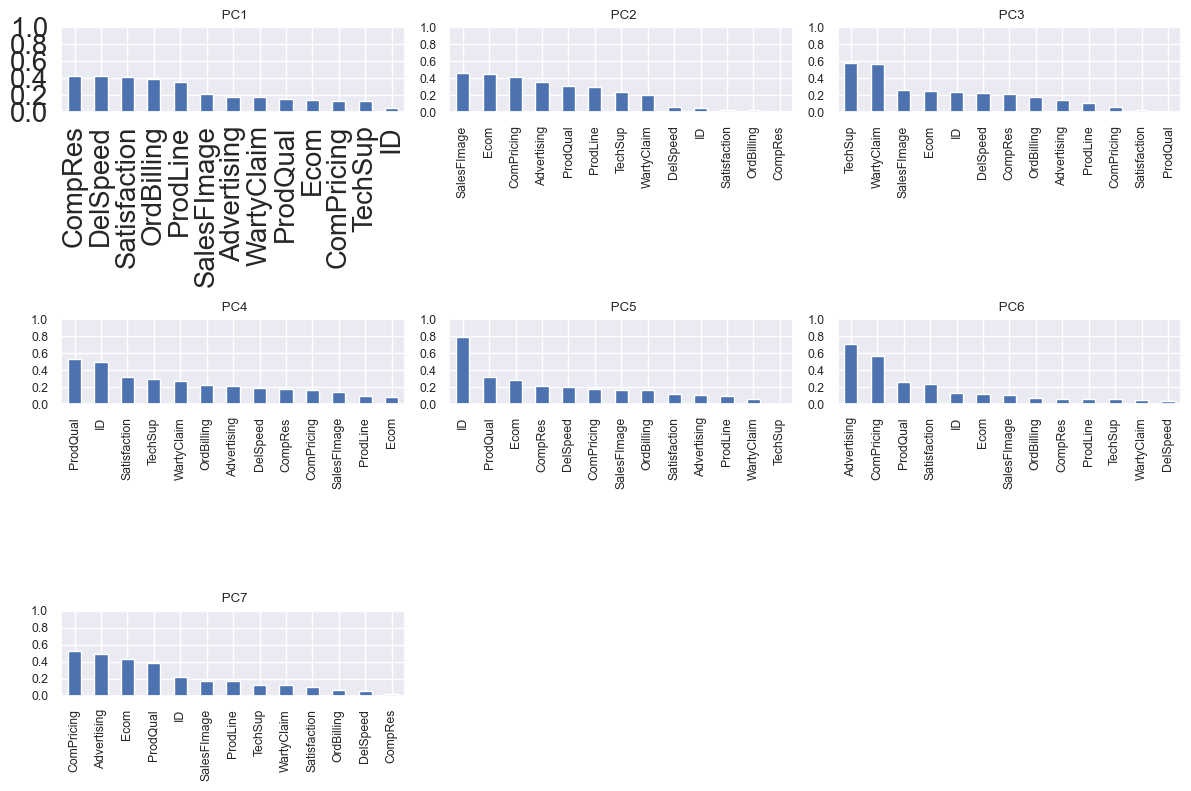

In [55]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (12,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,3,i+1)
    sns.set(font_scale=0.8)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title(' {}'.format(df_selected.columns[i]))
    plt.tight_layout()